<span style='color:Blue'> <font size="4">Import libraries </font> </span>
### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1. Import datasets

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type  ... female_age_mean  female_age_median  \
0    Hamilton        Hamilton   City  ...        44.48629           45.33333   
1  South Bend        Roseland   City  ...        36.48391           37.58333   
2    Danville        Danville   City  ...        42.15810           42.83333   
3    San Juan        Guaynabo  Urban  ...        47.77526           50.58333   
4   Manhattan  Manhattan City   City  ...        24.17693           21.58333   

   female_age_stdev  female_age_sample_weight female_age_samples  pct_own  \
0          22.51276                 685.33845             2618.0  0.79046   
1          23.43353                 267.23367             1284.0  0.52483   
2          23.94119                 707.01963             3238.0  0.85331   
3          24.32015                 362.20193             1559.0  0.65037   
4          11.10484                1854.48652             3051.0  0.13046   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  
3  0.47257      0.02021    0.02021   0.10106  
4  0.12356      0.00000    0.00000   0.03109  

[5 rows x 80 columns]

In [4]:
test_df.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type  ... female_age_mean  \
0         Detroit  Dearborn Heights City      CDP  ...        34.78682   
1          Auburn            Auburn City     City  ...        44.23451   
2       Pine City              Millerton  Borough  ...        41.62426   
3      Monticello        Monticello City     City  ...        44.81200   
4  Corpus Christi                  Edroy     Town  ...        40.66618   

   female_age_median  female_age_stdev  female_age_sample_weight  \
0           33.75000          21.58531                 416.48097   
1           46.66667          22.37036                 532.03505   
2           44.50000          22.86213                 453.11959   
3           48.00000          21.03155                 263.94320   
4           42.66667          21.30900                 709.90829   

   female_age_samples  pct_own  married  married_snp  separated  divorced  
0              1938.0  0.70252  0.28217      0.05910    0.03813   0.14299  
1              1950.0  0.85128  0.64221      0.02338    0.00000   0.13377  
2              1879.0  0.81897  0.59961      0.01746    0.01358   0.10026  
3              1081.0  0.84609  0.56953      0.05492    0.04694   0.12489  
4              2956.0  0.79077  0.57620      0.01726    0.00588   0.16379  

[5 rows x 80 columns]

### 2. Figure out the primary key and look for the requirement of indexing

<span style='color:green'> <font size="4"> UID is a primary key and there is no need of indexing </font> </span>

### 3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [5]:
train_df.shape

(12513, 80)

In [6]:
test_df.shape

(8937, 80)

In [7]:
train_df.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [8]:
for i in range(0, len(np.array_split(train_df.isnull().sum(), 5))):
    print((np.array_split(train_df.isnull().sum(), 5)[i]))
    print()

UID              0
BLOCKID      12513
SUMLEVEL         0
COUNTYID         0
STATEID          0
state            0
state_ab         0
city             0
place            0
type             0
primary          0
zip_code         0
area_code        0
lat              0
lng              0
ALand            1
dtype: int64

AWater                  1
pop                     1
male_pop                1
female_pop              1
rent_mean             141
rent_median           141
rent_stdev            141
rent_sample_weight    141
rent_samples          141
rent_gt_10            141
rent_gt_15            141
rent_gt_20            141
rent_gt_25            141
rent_gt_30            141
rent_gt_35            141
rent_gt_40            141
dtype: int64

rent_gt_50              141
universe_samples          1
used_samples              1
hi_mean                 125
hi_median               125
hi_stdev                125
hi_sample_weight        125
hi_samples              125
family_mean             141


In [9]:
Fill_rate=(train_df.isnull().sum()/len(train_df))*100

In [10]:
for i in range(0, len(np.array_split(Fill_rate, 5))):
    print((np.array_split(Fill_rate, 5)[i]))
    print()

UID            0.000000
BLOCKID      100.000000
SUMLEVEL       0.000000
COUNTYID       0.000000
STATEID        0.000000
state          0.000000
state_ab       0.000000
city           0.000000
place          0.000000
type           0.000000
primary        0.000000
zip_code       0.000000
area_code      0.000000
lat            0.000000
lng            0.000000
ALand          0.007992
dtype: float64

AWater                0.007992
pop                   0.007992
male_pop              0.007992
female_pop            0.007992
rent_mean             1.126828
rent_median           1.126828
rent_stdev            1.126828
rent_sample_weight    1.126828
rent_samples          1.126828
rent_gt_10            1.126828
rent_gt_15            1.126828
rent_gt_20            1.126828
rent_gt_25            1.126828
rent_gt_30            1.126828
rent_gt_35            1.126828
rent_gt_40            1.126828
dtype: float64

rent_gt_50              1.126828
universe_samples        0.007992
used_samples          

BLOCKID has 100% null values, so drop this column.

In [11]:
train_df.drop(columns=['BLOCKID'],axis=1,inplace=True)

In [12]:
train_df.shape

(12513, 79)

In [13]:
len(train_df.columns[train_df.isnull().sum(axis=0)>0])

65

In [14]:
null_rows=train_df[train_df.isnull().any(axis=1)]

In [15]:
null_rows

UID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
51     223593       140        19        4      Arizona       AZ   
94     233040       140       101        8     Colorado       CO   
153    263292       140        13       34   New Jersey       NJ   
302    267158       140        47       36     New York       NY   
340    292484       140        25       55    Wisconsin       WI   
...       ...       ...       ...      ...          ...      ...   
12338  279610       140       127       72  Puerto Rico       PR   
12361  274458       140       109       40     Oklahoma       OK   
12435  290374       140       710       51     Virginia       VA   
12494  246025       140        95       18      Indiana       IN   
12512  256921       140       137       27    Minnesota       MN   

                city               place   type primary  ...  female_age_mean  \
51            Tucson          Littletown    CDP   tract  ...         40.02370   
94            Pueblo         Pueblo City   City   tract  ...         20.00784   
153           Newark         Silver Lake   City   tract  ...         35.47667   
302         Brooklyn       New York City   City   tract  ...              NaN   
340          Madison        Madison City   City   tract  ...         22.03226   
...              ...                 ...    ...     ...  ...              ...   
12338       San Juan            San Juan  Urban   tract  ...         26.77626   
12361  Oklahoma City  Oklahoma City City    CDP   tract  ...         59.38249   
12435        Norfolk        Norfolk City   Town   tract  ...              NaN   
12494      Pendleton           Pendleton   City   tract  ...         54.28123   
12512         Duluth         Duluth City   City   tract  ...              NaN   

       female_age_median  female_age_stdev female_age_sample_weight  \
51              40.83333           8.49563                 30.01695   
94              19.25000           4.30291                172.56153   
153             35.58333          20.62717                369.61740   
302                  NaN               NaN                      NaN   
340             21.08333           5.13435               1365.86300   
...                  ...               ...                      ...   
12338           24.41667          19.03316                366.92156   
12361           64.16667          13.96468                 20.66249   
12435                NaN               NaN                      NaN   
12494           54.25000           2.78274                  1.67797   
12512                NaN               NaN                      NaN   

       female_age_samples  pct_own  married  married_snp  separated  divorced  
51                  161.0      NaN  0.16308      0.16308    0.02634   0.20499  
94                  309.0  0.00000  0.00000      0.00000    0.00000   0.00000  
153                1671.0  0.24002  0.37411      0.05579    0.02504   0.07654  
302                   NaN      NaN      NaN          NaN        NaN       NaN  
340                1981.0  0.00000  0.00773      0.00000    0.00000   0.01160  
...                   ...      ...      ...          ...        ...       ...  
12338              1432.0  0.00000  0.03865      0.00000    0.00000   0.05314  
12361                67.0  0.02198  0.11712      0.04505    0.00000   0.48649  
12435                 NaN      NaN      NaN          NaN        NaN       NaN  
12494                 9.0  0.00000  0.10288      0.10288    0.02337   0.25677  
12512                 NaN      NaN      NaN          NaN        NaN       NaN  

[348 rows x 79 columns]

In [16]:
(348/21450)*100

1.6223776223776225

Since only 1.62% of data is missing, we can remove these rows without loosing any information.

In [17]:
train_df = pd.concat([train_df, null_rows, null_rows]).drop_duplicates(keep=False)

In [18]:
train_df.shape

(12165, 79)

In [19]:
len(train_df.columns[train_df.isnull().sum(axis=0)>0])

0

In [20]:
for i in range(0, len(train_df.columns), 10):
    print(train_df[train_df.columns[i:i+10]].head())
    print()

      UID  SUMLEVEL  COUNTYID  STATEID        state state_ab        city  \
0  267822       140        53       36     New York       NY    Hamilton   
1  246444       140       141       18      Indiana       IN  South Bend   
2  245683       140        63       18      Indiana       IN    Danville   
3  279653       140       127       72  Puerto Rico       PR    San Juan   
4  247218       140       161       20       Kansas       KS   Manhattan   

            place   type primary  
0        Hamilton   City   tract  
1        Roseland   City   tract  
2        Danville   City   tract  
3        Guaynabo  Urban   tract  
4  Manhattan City   City   tract  

   zip_code  area_code        lat        lng        ALand     AWater     pop  \
0     13346        315  42.840812 -75.501524  202183361.0  1699120.0  5230.0   
1     46616        574  41.701441 -86.266614    1560828.0   100363.0  2633.0   
2     46122        317  39.792202 -86.515246   69561595.0   284193.0  6881.0   
3       927 

In [21]:
train_df['SUMLEVEL'].unique()

array([140])

In [22]:
train_df['primary'].unique()

array(['tract'], dtype=object)

'primary' and 'SUMLEVEL' columns has no variane, hence drop these columns from dataset.

In [23]:
train_df.drop(['SUMLEVEL', 'primary'], axis=1, inplace=True)

In [24]:
train_df.shape

(12165, 77)

### 4.	Understanding homeowner costs are incredibly valuable because it is positively correlated to consumer spending which drives the economy through disposable income. Perform debt analysis. You may want to follow the following steps:

•	Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10%. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to roughly 50%.

In [25]:
top_2500_locations=train_df[(train_df['second_mortgage']<0.5) & (train_df['pct_own']>0.1)].sort_values(by='second_mortgage',ascending=False).head(2500)

In [26]:
top_2500_locations

UID  COUNTYID  STATEID          state state_ab         city  \
11980  251185        27       25  Massachusetts       MA    Worcester   
7829   251324         3       24       Maryland       MD  Glen Burnie   
2077   235788        57       12        Florida       FL        Tampa   
1701   242304        31       17       Illinois       IL      Chicago   
11839  242546        31       17       Illinois       IL      Chicago   
...       ...       ...      ...            ...      ...          ...   
911    239895       135       13        Georgia       GA      Lilburn   
7808   267972        55       36       New York       NY    Rochester   
6067   273544       153       39           Ohio       OH        Akron   
7506   273601       155       39           Ohio       OH       Warren   
3118   279940         7       44   Rhode Island       RI   Providence   

                   place     type  zip_code  area_code  ...  female_age_mean  \
11980     Worcester City     City      1610        508  ...         30.60147   
7829         Glen Burnie      CDP     21061        410  ...         32.53273   
2077     Egypt Lake-leto     City     33614        813  ...         34.53924   
1701         Lincolnwood  Village     60640        773  ...         43.85811   
11839       Chicago City  Village     60622        773  ...         29.46922   
...                  ...      ...       ...        ...  ...              ...   
911         Lilburn City     City     30047        770  ...         38.94562   
7808              Greece     City     14616        585  ...         41.55050   
6067   New Franklin City  Village     44319        330  ...         44.02096   
7506       Cortland City  Village     44481        330  ...         47.12826   
3118     Providence City      CDP      2908        401  ...         37.78523   

      female_age_median  female_age_stdev  female_age_sample_weight  \
11980          26.16667          19.21553                 262.09529   
7829           30.66667          19.61959                 694.10357   
2077           28.58333          18.56943                 814.45000   
1701           39.83333          21.71686                 374.52605   
11839          28.50000          17.18452                 449.42977   
...                 ...               ...                       ...   
911            41.58333          22.49806                 918.65792   
7808           42.50000          23.53709                 666.78464   
6067           46.58333          23.66959                 594.26522   
7506           48.75000          21.91435                 702.72390   
3118           25.83333          22.91600                1428.92915   

       female_age_samples  pct_own  married  married_snp  separated  divorced  
11980               994.0  0.20247  0.37844      0.11976    0.09341   0.10539  
7829               2881.0  0.22380  0.58250      0.08321    0.00000   0.01778  
2077               2684.0  0.11618  0.36953      0.12876    0.09957   0.07339  
1701               1802.0  0.14228  0.41366      0.13852    0.01771   0.09677  
11839              1851.0  0.29468  0.18051      0.00872    0.00872   0.04308  
...                   ...      ...      ...          ...        ...       ...  
911                3500.0  0.86088  0.59390      0.01109    0.00000   0.04437  
7808               2685.0  0.78024  0.48741      0.01432    0.00395   0.08148  
6067               2257.0  0.85329  0.55234      0.01894    0.01210   0.13151  
7506               2939.0  0.82822  0.59251      0.03485    0.02668   0.10413  
3118               3972.0  0.81260  0.39025      0.04663    0.00281   0.03331  

[2500 rows x 77 columns]

In [27]:
import plotly.express as px

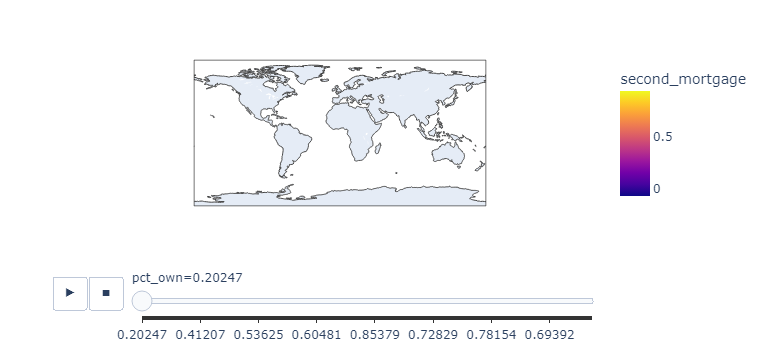

In [28]:
fig=px.choropleth(top_2500_locations,locations='place', color='second_mortgage', scope='world', 
                  hover_name='state', animation_frame='pct_own')
fig.show()

In [29]:
import geopandas as gpd

In [30]:
top_2500_locations=top_2500_locations[['second_mortgage','pct_own','zip_code','state','place','lat','lng']]
top_2500_locations.head()

second_mortgage  pct_own  zip_code          state            place  \
11980          0.43363  0.20247      1610  Massachusetts   Worcester City   
7829           0.30212  0.22380     21061       Maryland      Glen Burnie   
2077           0.28972  0.11618     33614        Florida  Egypt Lake-leto   
1701           0.28899  0.14228     60640       Illinois      Lincolnwood   
11839          0.27431  0.29468     60622       Illinois     Chicago City   

             lat          lng  
11980  42.254262  -71.8003471  
7829   39.127273   -76.635265  
2077   28.029063   -82.495395  
1701   41.967289   -87.652434  
11839  41.906640  -87.6895801

In [31]:
#using geopandas to convert longitude and latitude to points
df_geo=gpd.GeoDataFrame(top_2500_locations,geometry=gpd.points_from_xy(top_2500_locations.lng,top_2500_locations.lat))

In [32]:
df_geo

second_mortgage  pct_own  zip_code          state              place  \
11980          0.43363  0.20247      1610  Massachusetts     Worcester City   
7829           0.30212  0.22380     21061       Maryland        Glen Burnie   
2077           0.28972  0.11618     33614        Florida    Egypt Lake-leto   
1701           0.28899  0.14228     60640       Illinois        Lincolnwood   
11839          0.27431  0.29468     60622       Illinois       Chicago City   
...                ...      ...       ...            ...                ...   
911            0.04788  0.86088     30047        Georgia       Lilburn City   
7808           0.04786  0.78024     14616       New York             Greece   
6067           0.04786  0.85329     44319           Ohio  New Franklin City   
7506           0.04785  0.82822     44481           Ohio      Cortland City   
3118           0.04785  0.81260      2908   Rhode Island    Providence City   

             lat          lng                    geometry  
11980  42.254262  -71.8003471  POINT (-71.80035 42.25426)  
7829   39.127273   -76.635265  POINT (-76.63526 39.12727)  
2077   28.029063   -82.495395  POINT (-82.49540 28.02906)  
1701   41.967289   -87.652434  POINT (-87.65243 41.96729)  
11839  41.906640  -87.6895801  POINT (-87.68958 41.90664)  
...          ...          ...                         ...  
911    33.871867   -84.112585  POINT (-84.11258 33.87187)  
7808   43.242071   -77.652999  POINT (-77.65300 43.24207)  
6067   40.969223   -81.554209  POINT (-81.55421 40.96922)  
7506   41.319131   -80.772099  POINT (-80.77210 41.31913)  
3118   41.843465   -71.450417  POINT (-71.45042 41.84346)  

[2500 rows x 8 columns]

In [33]:
#get built in world dataset
world_data=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Text(0.5, 1.0, 'USA states')

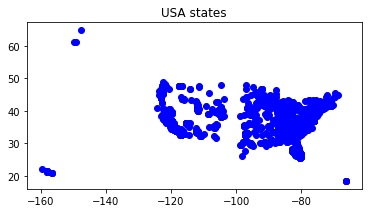

In [34]:
#plot world map
axis=world_data[world_data.continent=='USA'].plot(
color='lightblue',edgecolor='black')

df_geo.plot(ax=axis, color='blue')
plt.title('USA states')

•	Bad debt is the debt you should avoid at all costs such as a second mortgage or home equity loan. Conversely, Good debt is all other debt not including second mortgage or home equity loan.
Bad Debt Equation:
Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage 

In [35]:
train_df['Bad_debt']=train_df['second_mortgage']+train_df['home_equity']
-train_df['home_equity_second_mortgage']

0       -0.01588
1       -0.02222
2       -0.00000
3       -0.01086
4       -0.05426
          ...   
12507   -0.02677
12508   -0.00000
12509   -0.00000
12510   -0.06237
12511   -0.01892
Name: home_equity_second_mortgage, Length: 12165, dtype: float64

In [36]:
train_df.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_

•	Create pie charts (Venn diagram) to show overall debt (% bad and good debt) and bad debt (2 mortgage and home equity loan).

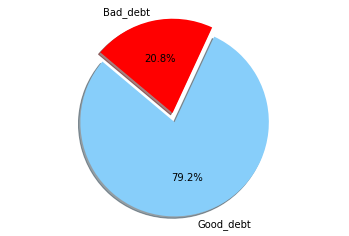

In [37]:
labels = 'Good_debt', 'Bad_debt'
colors = [ 'lightskyblue','red']
explode = (0.1, 0)  
plt.pie([(train_df['debt']-train_df['Bad_debt']).mean()*100, train_df['Bad_debt'].mean()*100],explode=explode,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

•	Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt and bad debt for different cities. 

In [38]:
train_df['Good_debt']=train_df['debt']-train_df['Bad_debt']
train_df.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_

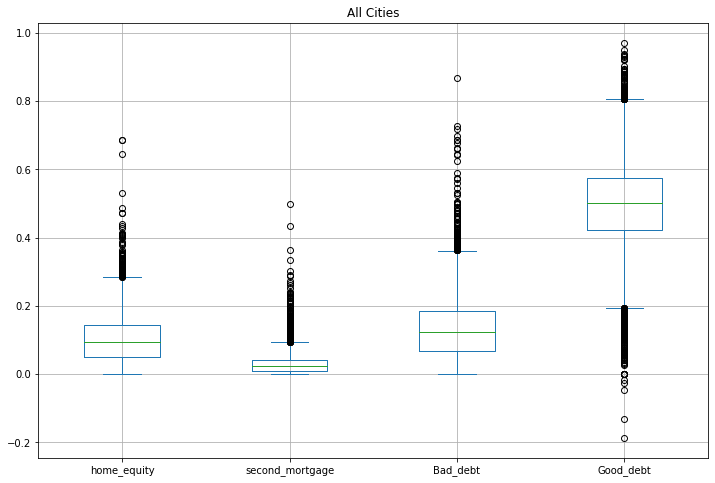

In [39]:
all_cities = train_df[['home_equity','second_mortgage','Bad_debt', 'Good_debt']]
all_cities.plot.box(figsize=(12,8),grid=True)
plt.title('All Cities')
plt.show()

In [40]:
cities = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn',
                  'Milwaukee', 'Aurora', 'Jacksonville', 'Denver', 'Charlotte',
                  'Las Vegas', 'Bronx', 'Baltimore', 'Minneapolis',
                  'Cincinnati', 'Long Beach', 'Colorado Springs', 'Sacramento',
                  'San Diego', 'New Orleans', 'Columbus', 'Lowell', 'Orlando',
                  'Portland', 'San Jose', 'Alexandria', 'Dallas', 'Atlanta',
                  'Littleton', 'Miami', 'Oakland', 'Houston']

In [41]:
boxplot_df = train_df[train_df['city'].isin (cities)]
#rpt[rpt['STK_ID'].isin(stk_list)]

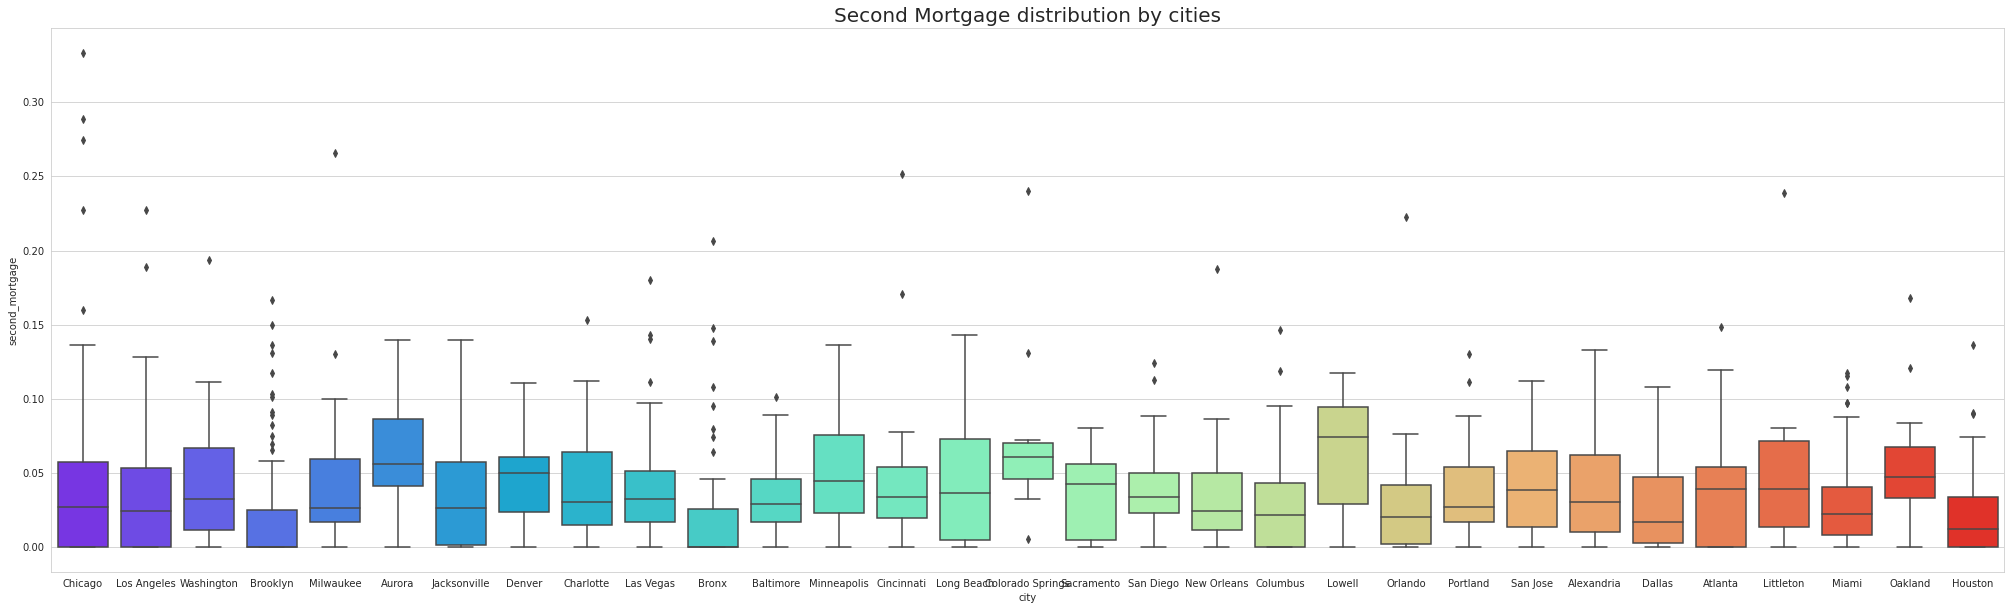

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='second_mortgage',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn',
                  'Milwaukee', 'Aurora', 'Jacksonville', 'Denver', 'Charlotte',
                  'Las Vegas', 'Bronx', 'Baltimore', 'Minneapolis',
                  'Cincinnati', 'Long Beach', 'Colorado Springs', 'Sacramento',
                  'San Diego', 'New Orleans', 'Columbus', 'Lowell', 'Orlando',
                  'Portland', 'San Jose', 'Alexandria', 'Dallas', 'Atlanta',
                  'Littleton', 'Miami', 'Oakland', 'Houston']).set_title('Second Mortgage distribution by cities', fontsize = 20)
plt.show()

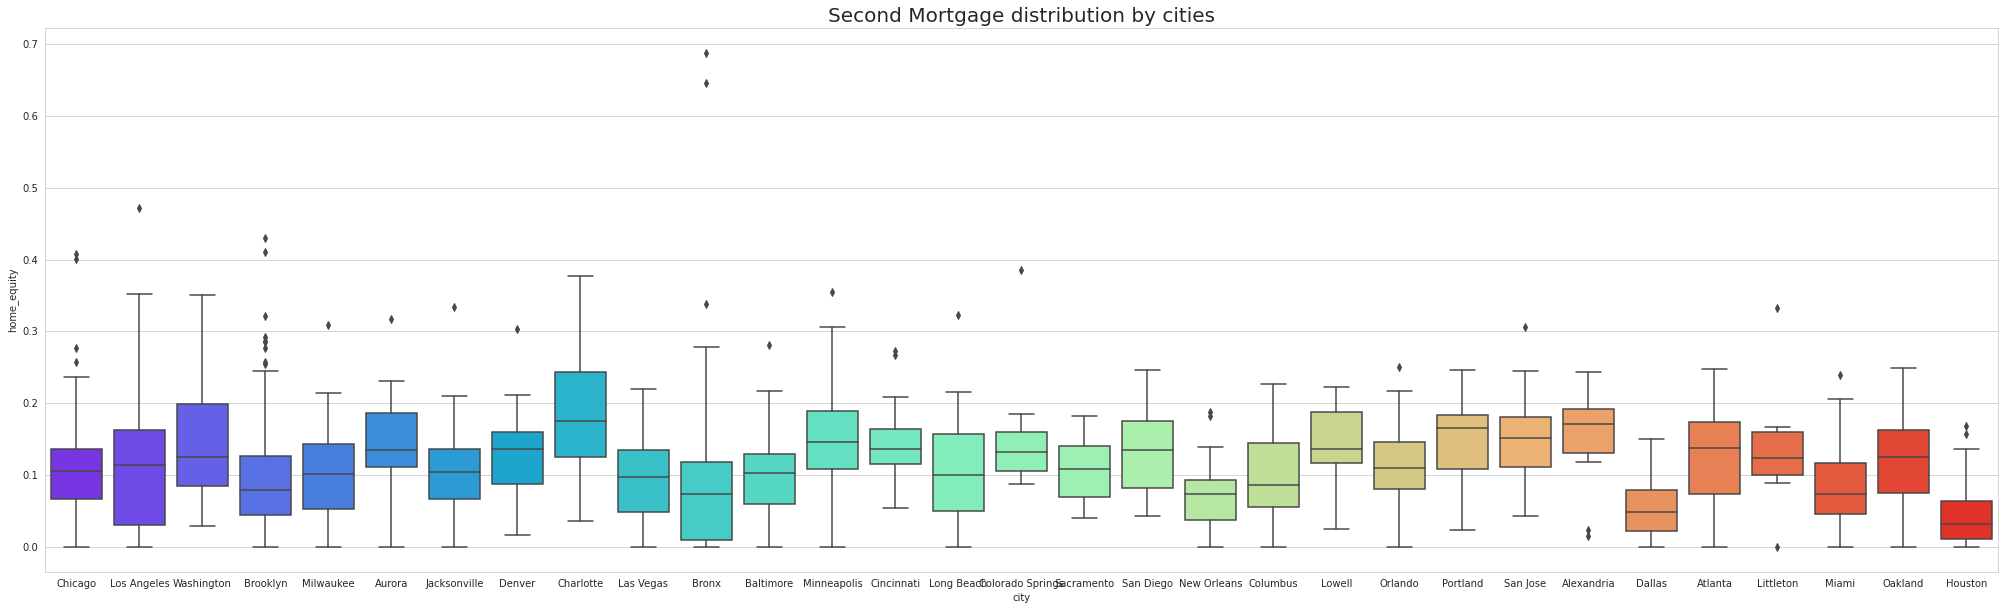

In [43]:
plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='home_equity',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn',
                  'Milwaukee', 'Aurora', 'Jacksonville', 'Denver', 'Charlotte',
                  'Las Vegas', 'Bronx', 'Baltimore', 'Minneapolis',
                  'Cincinnati', 'Long Beach', 'Colorado Springs', 'Sacramento',
                  'San Diego', 'New Orleans', 'Columbus', 'Lowell', 'Orlando',
                  'Portland', 'San Jose', 'Alexandria', 'Dallas', 'Atlanta',
                  'Littleton', 'Miami', 'Oakland', 'Houston']).set_title('Second Mortgage distribution by cities', fontsize = 20)
plt.show()

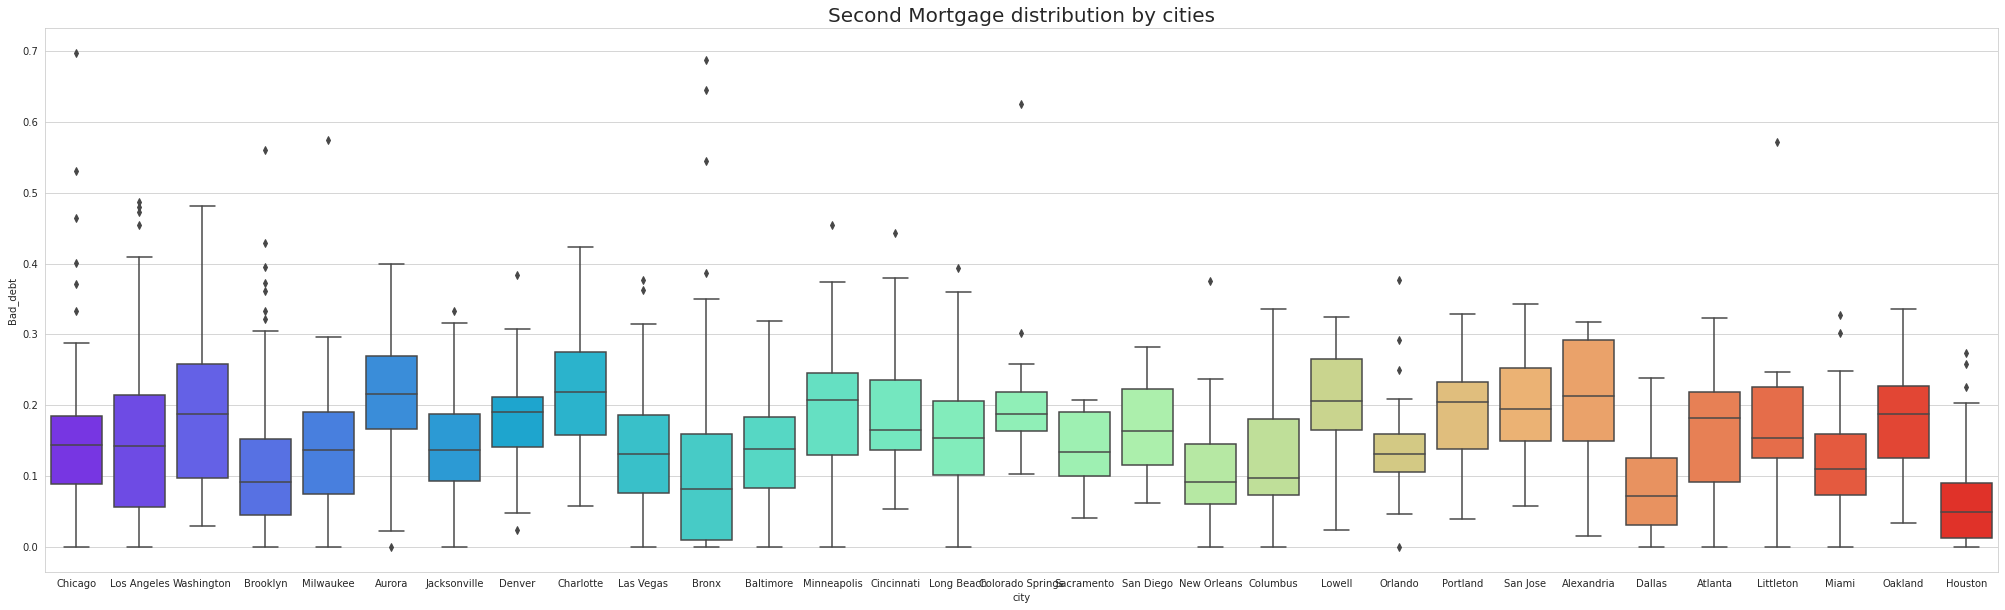

In [44]:
plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='Bad_debt',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn',
                  'Milwaukee', 'Aurora', 'Jacksonville', 'Denver', 'Charlotte',
                  'Las Vegas', 'Bronx', 'Baltimore', 'Minneapolis',
                  'Cincinnati', 'Long Beach', 'Colorado Springs', 'Sacramento',
                  'San Diego', 'New Orleans', 'Columbus', 'Lowell', 'Orlando',
                  'Portland', 'San Jose', 'Alexandria', 'Dallas', 'Atlanta',
                  'Littleton', 'Miami', 'Oakland', 'Houston']).set_title('Second Mortgage distribution by cities', fontsize = 20)
plt.show()

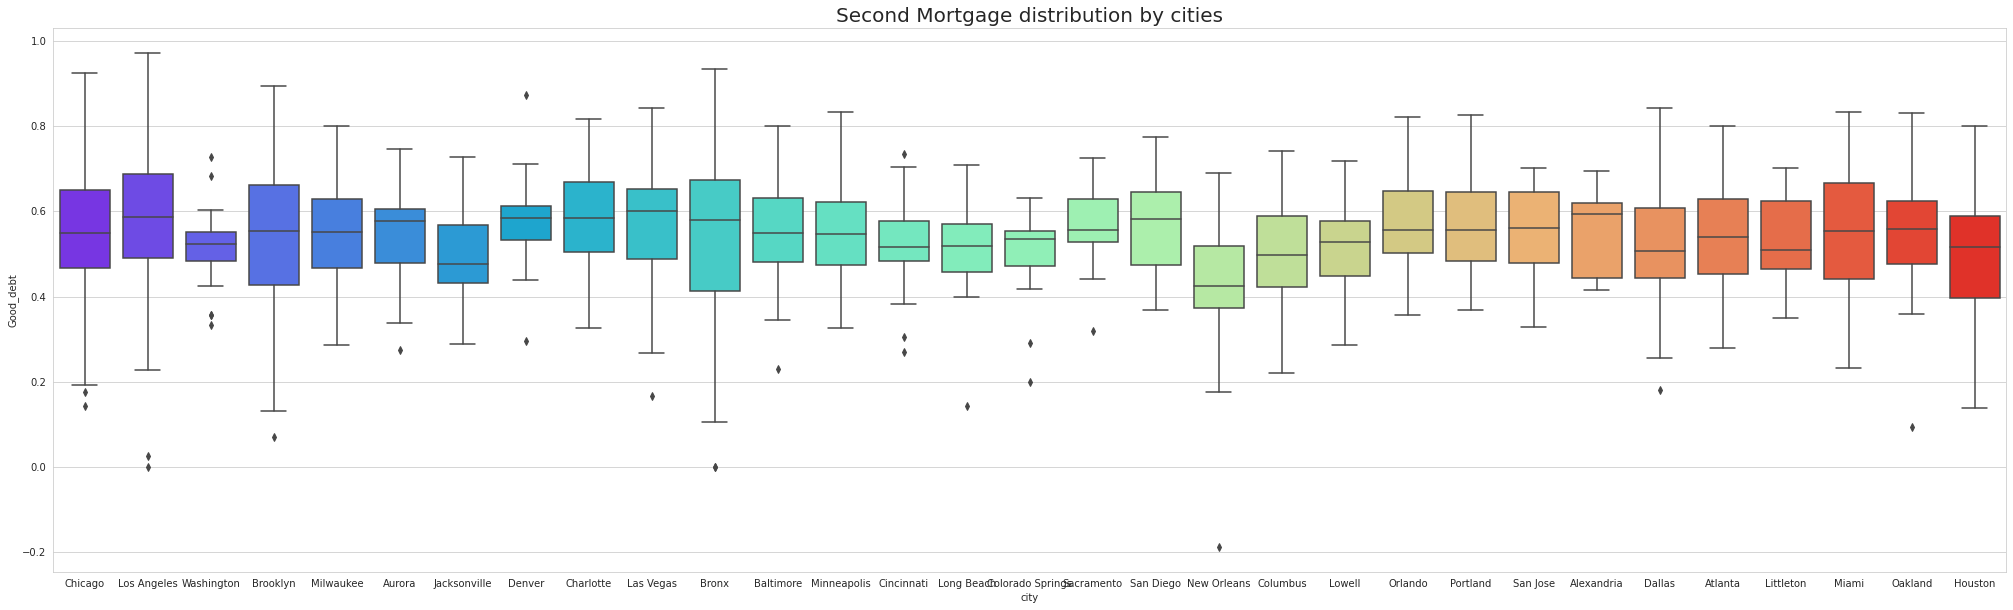

In [45]:
plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='Good_debt',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Los Angeles', 'Washington', 'Brooklyn',
                  'Milwaukee', 'Aurora', 'Jacksonville', 'Denver', 'Charlotte',
                  'Las Vegas', 'Bronx', 'Baltimore', 'Minneapolis',
                  'Cincinnati', 'Long Beach', 'Colorado Springs', 'Sacramento',
                  'San Diego', 'New Orleans', 'Columbus', 'Lowell', 'Orlando',
                  'Portland', 'San Jose', 'Alexandria', 'Dallas', 'Atlanta',
                  'Littleton', 'Miami', 'Oakland', 'Houston']).set_title('Second Mortgage distribution by cities', fontsize = 20)
plt.show()

•	Create a collated income distribution chart for family income, house hold income and remaining income. 

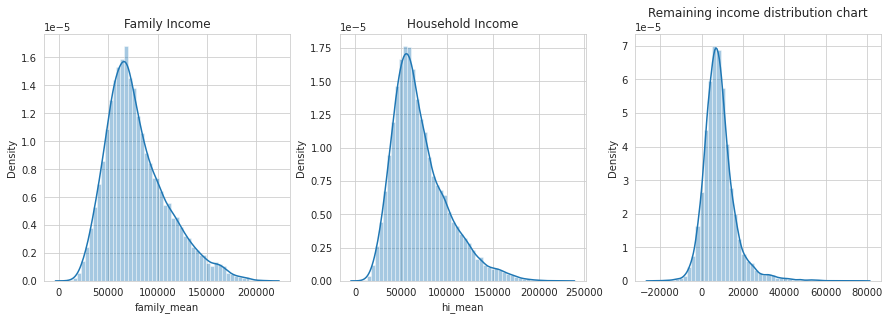

In [46]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.distplot(train_df['family_mean'])
plt.title('Family Income')
plt.subplot(2,3,2)
sns.distplot(train_df['hi_mean'])
plt.title('Household Income')
plt.subplot(2,3,3)
sns.distplot(train_df['family_mean']-train_df['hi_mean'])
plt.title('Remaining income distribution chart')
plt.show()

### 5.	Perform EDA and come out with insights into population density and age. You may require deriving new fields (Make sure to weight averages for accurate measurements): 

•	Population density (hint-use ‘pop’ and ‘Aland’ to calculate)

In [47]:
train_df['population_density']=train_df['pop']/train_df['ALand']

In [48]:
train_df.head()

UID  COUNTYID  STATEID        state state_ab        city  \
0  267822        53       36     New York       NY    Hamilton   
1  246444       141       18      Indiana       IN  South Bend   
2  245683        63       18      Indiana       IN    Danville   
3  279653       127       72  Puerto Rico       PR    San Juan   
4  247218       161       20       Kansas       KS   Manhattan   

            place   type  zip_code  area_code  ...  female_age_sample_weight  \
0        Hamilton   City     13346        315  ...                 685.33845   
1        Roseland   City     46616        574  ...                 267.23367   
2        Danville   City     46122        317  ...                 707.01963   
3        Guaynabo  Urban       927        787  ...                 362.20193   
4  Manhattan City   City     66502        785  ...                1854.48652   

  female_age_samples  pct_own  married  married_snp  separated  divorced  \
0             2618.0  0.79046  0.57851      0.01882    0.01240   0.08770   
1             1284.0  0.52483  0.34886      0.01426    0.01426   0.09030   
2             3238.0  0.85331  0.64745      0.02830    0.01607   0.10657   
3             1559.0  0.65037  0.47257      0.02021    0.02021   0.10106   
4             3051.0  0.13046  0.12356      0.00000    0.00000   0.03109   

   Bad_debt  Good_debt  population_density  
0   0.10996    0.41967            0.000026  
1   0.06496    0.54359            0.001687  
2   0.09512    0.63972            0.000099  
3   0.02172    0.50542            0.002442  
4   0.10852    0.41086            0.002207  

[5 rows x 80 columns]

•	median age (hint-use the variables ‘male_age_median’, ‘female_age_median’, ‘male_pop’, ‘female_pop’)

In [49]:
train_df['median_age']=((train_df['female_age_median']*train_df['female_pop'])
+(train_df['male_age_median']*train_df['male_pop']))/(train_df['female_pop']+train_df['male_pop'])

In [50]:
train_df.head()

UID  COUNTYID  STATEID        state state_ab        city  \
0  267822        53       36     New York       NY    Hamilton   
1  246444       141       18      Indiana       IN  South Bend   
2  245683        63       18      Indiana       IN    Danville   
3  279653       127       72  Puerto Rico       PR    San Juan   
4  247218       161       20       Kansas       KS   Manhattan   

            place   type  zip_code  area_code  ...  female_age_samples  \
0        Hamilton   City     13346        315  ...              2618.0   
1        Roseland   City     46616        574  ...              1284.0   
2        Danville   City     46122        317  ...              3238.0   
3        Guaynabo  Urban       927        787  ...              1559.0   
4  Manhattan City   City     66502        785  ...              3051.0   

   pct_own  married  married_snp  separated  divorced  Bad_debt  Good_debt  \
0  0.79046  0.57851      0.01882    0.01240   0.08770   0.10996    0.41967   
1  0.52483  0.34886      0.01426    0.01426   0.09030   0.06496    0.54359   
2  0.85331  0.64745      0.02830    0.01607   0.10657   0.09512    0.63972   
3  0.65037  0.47257      0.02021    0.02021   0.10106   0.02172    0.50542   
4  0.13046  0.12356      0.00000    0.00000   0.03109   0.10852    0.41086   

   population_density  median_age  
0            0.000026   44.667430  
1            0.001687   34.722748  
2            0.000099   41.774472  
3            0.002442   49.879012  
4            0.002207   21.965629  

[5 rows x 81 columns]

•	Visualize the findings using appropriate chart type.

<AxesSubplot: xlabel='population_density', ylabel='Count'>

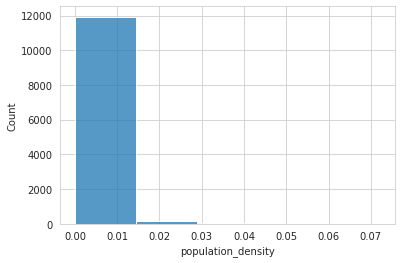

In [51]:
sns.histplot(train_df['population_density'],bins=5)

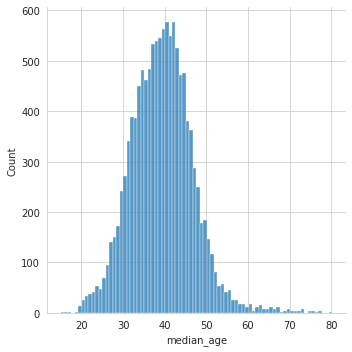

In [52]:
sns.displot(train_df['median_age'])

### 6.	Create bins for population into a new variable by selecting appropriate class interval so that the no of categories(bins) don’t exceed 5 for the ease of analysis. 

In [53]:
bins = [0, 12,18, 35, 55, 100]
labels = ['kids', 'Youth', 'Young Adult', 'Adult', 'Senior']

In [54]:
train_df['male_population_bracket'] = pd.cut(train_df['male_age_median'], bins, labels = labels)

In [55]:
train_df['female_population_bracket'] = pd.cut(train_df['female_age_median'], bins, labels = labels)

In [56]:
train_df.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_

In [57]:
train_df['male_population_bracket'].value_counts()

Adult          7702
Young Adult    4196
Senior          250
Youth            16
kids              1
Name: male_population_bracket, dtype: int64

In [58]:
train_df['female_population_bracket'].value_counts()

Adult          8831
Young Adult    2951
Senior          380
Youth             3
kids              0
Name: female_population_bracket, dtype: int64

In [59]:
train_df['female_population_bracket']

0              Adult
1              Adult
2              Adult
3              Adult
4        Young Adult
            ...     
12507          Adult
12508    Young Adult
12509          Adult
12510    Young Adult
12511          Adult
Name: female_population_bracket, Length: 12165, dtype: category
Categories (5, object): ['kids' < 'Youth' < 'Young Adult' < 'Adult' < 'Senior']

In [60]:
train_df['married']

0        0.57851
1        0.34886
2        0.64745
3        0.47257
4        0.12356
          ...   
12507    0.49414
12508    0.29096
12509    0.41594
12510    0.44332
12511    0.53217
Name: married, Length: 12165, dtype: float64

•	Analyze the married, separated and divorced population for these population brackets. 

In [61]:
pop_bin_male=train_df.groupby(by='male_population_bracket')[['married','separated','divorced']].mean()

In [62]:
pop_bin_male

married  separated  divorced
male_population_bracket                               
kids                     0.244980   0.000000  0.020080
Youth                    0.437084   0.029179  0.062047
Young Adult              0.433805   0.022619  0.093513
Adult                    0.552090   0.017620  0.104026
Senior                   0.629958   0.015045  0.119513

•	Visualize using appropriate chart type.

<BarContainer object of 12165 artists>

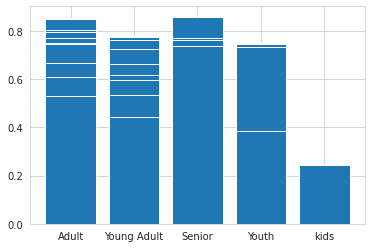

In [63]:
plt.bar(train_df['male_population_bracket'],train_df['married'])

Text(0, 0.5, 'Divorced')

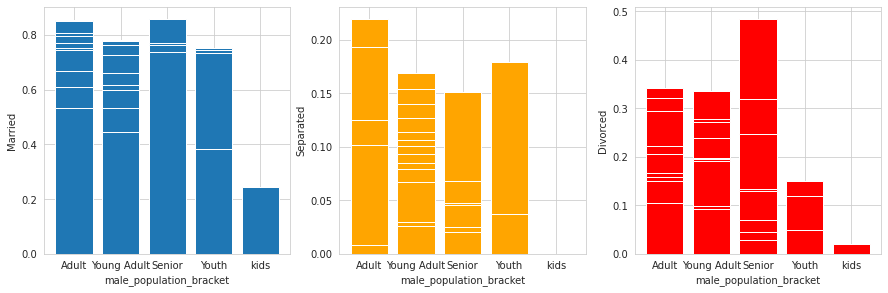

In [64]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.bar(train_df['male_population_bracket'],train_df['married'])
plt.xlabel('male_population_bracket')
plt.ylabel('Married')
plt.subplot(2,3,2)
plt.bar(train_df['male_population_bracket'],train_df['separated'],color='orange')
plt.xlabel('male_population_bracket')
plt.ylabel('Separated')
plt.subplot(2,3,3)
plt.bar(train_df['male_population_bracket'],train_df['divorced'],color='red')
plt.xlabel('male_population_bracket')
plt.ylabel('Divorced')

Text(0, 0.5, 'Divorced')

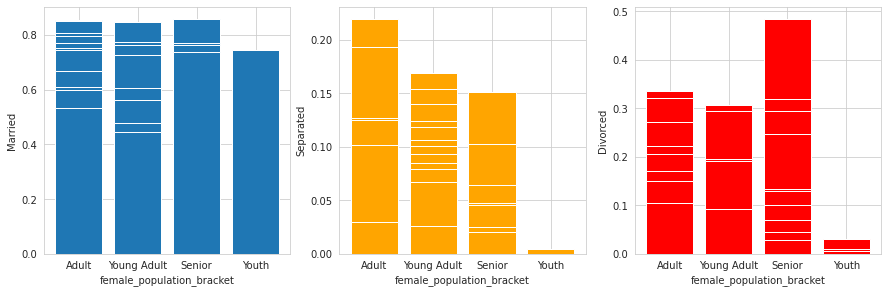

In [65]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.bar(train_df['female_population_bracket'],train_df['married'])
plt.xlabel('female_population_bracket')
plt.ylabel('Married')
plt.subplot(2,3,2)
plt.bar(train_df['female_population_bracket'],train_df['separated'],color='orange')
plt.xlabel('female_population_bracket')
plt.ylabel('Separated')
plt.subplot(2,3,3)
plt.bar(train_df['female_population_bracket'],train_df['divorced'],color='red')
plt.xlabel('female_population_bracket')
plt.ylabel('Divorced')

### 7.	Please detail your observations for rent as a percentage of income at an overall level and for different states.

In [66]:
rent_mean_state=train_df.groupby(by='state')['rent_mean'].mean()

In [67]:
rent_mean_state.head()

state
Alabama        771.042232
Alaska        1156.152927
Arizona       1135.750582
Arkansas       721.914618
California    1489.618355
Name: rent_mean, dtype: float64

In [68]:
overall_income_mean_state=train_df.groupby(by='state')['hi_mean'].mean()

In [69]:
overall_income_mean_state.head()

state
Alabama       57950.893604
Alaska        77778.255351
Arizona       69566.311650
Arkansas      54534.802898
California    82940.215376
Name: hi_mean, dtype: float64

In [70]:
percentage_of_rent=(rent_mean_state/overall_income_mean_state)*100

In [71]:
percentage_of_rent.head()

state
Alabama       1.330510
Alaska        1.486473
Arizona       1.632616
Arkansas      1.323769
California    1.796015
dtype: float64

In [72]:
percentage_of_rent_1=percentage_of_rent.head(10)

In [73]:
percentage_of_rent_1

state
Alabama                 1.330510
Alaska                  1.486473
Arizona                 1.632616
Arkansas                1.323769
California              1.796015
Colorado                1.519084
Connecticut             1.416959
Delaware                1.414990
District of Columbia    1.534523
Florida                 1.812602
dtype: float64

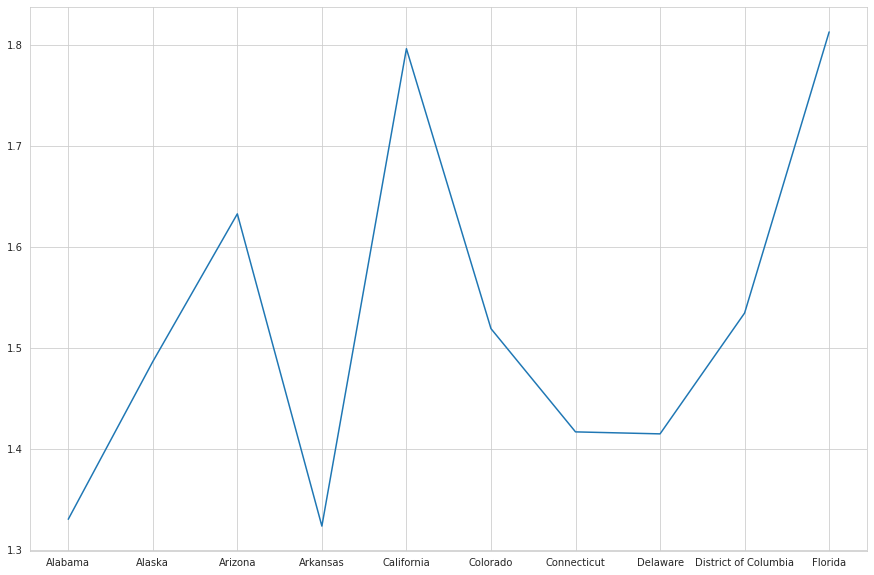

In [74]:
plt.figure(figsize=(15,10))
plt.plot(percentage_of_rent_1)

In [75]:
overall_percentage_of_rent=(rent_mean_state.sum()/overall_income_mean_state.sum())*100

In [76]:
overall_percentage_of_rent

1.4180239969724684

Overall rent as percentage of income at overall level is 1.41%

### 8.	Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings. 

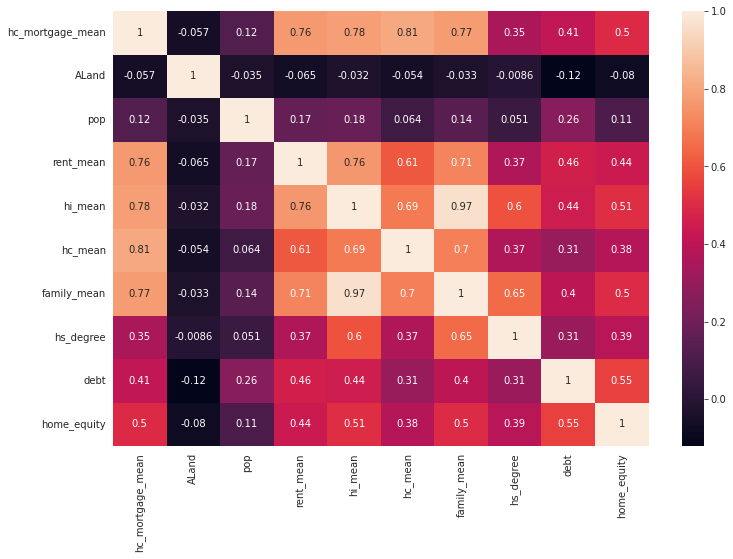

In [77]:
plt.figure(figsize=(12,8))
sns.heatmap(data=train_df[['hc_mortgage_mean','ALand','pop','rent_mean','hi_mean','hc_mean','family_mean',
                           'hs_degree','debt','home_equity']].corr(),annot=True)
plt.show()

*rent_mean, hi_mean, hc_mean, family_mean has a good correlation with the target i.e-hc_mortagage_mean*

### 10.	Build a linear Regression model to predict the total monthly expenditure for home mortgages loan; please refer - ‘deplotment_RE.xlsx’. 
Column "hc_mortgage_mean" is predicted variable. This is mean monthly mortgage and owner costs of specified geographical location.
Note: Exclude loans from prediction model which have NaN values for hc_mortgage_mean. NaN represents not a number/missing values.

1. Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step
2. Run another model at State level. There are 52 states in USA.

Considerations: Keep below considerations while building a linear regression model

1. Variables should have significant impact on predicting Monthly mortgage and owner costs
2. Utilize all predictor variable to start with initial hypothesis
3. R square of 60% and above should be achieved
4. Ensure Multi-collinearity does not exist in dependent variables
5. Test if predicted variable is normally distributed

In [78]:
len(train_df.columns[train_df.isnull().sum(axis=0)>0])

0

In [79]:
train_df.shape

(12165, 83)

In [80]:
test_df.shape

(8937, 80)

In [81]:
test_df.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type  ... female_age_mean  \
0         Detroit  Dearborn Heights City      CDP  ...        34.78682   
1          Auburn            Auburn City     City  ...        44.23451   
2       Pine City              Millerton  Borough  ...        41.62426   
3      Monticello        Monticello City     City  ...        44.81200   
4  Corpus Christi                  Edroy     Town  ...        40.66618   

   female_age_median  female_age_stdev  female_age_sample_weight  \
0           33.75000          21.58531                 416.48097   
1           46.66667          22.37036                 532.03505   
2           44.50000          22.86213                 453.11959   
3           48.00000          21.03155                 263.94320   
4           42.66667          21.30900                 709.90829   

   female_age_samples  pct_own  married  married_snp  separated  divorced  
0              1938.0  0.70252  0.28217      0.05910    0.03813   0.14299  
1              1950.0  0.85128  0.64221      0.02338    0.00000   0.13377  
2              1879.0  0.81897  0.59961      0.01746    0.01358   0.10026  
3              1081.0  0.84609  0.56953      0.05492    0.04694   0.12489  
4              2956.0  0.79077  0.57620      0.01726    0.00588   0.16379  

[5 rows x 80 columns]

In [82]:
len(test_df.columns[test_df.isnull().sum(axis=0)>0])

59

In [83]:
for i in range(0, len(np.array_split(test_df.isnull().sum(), 5))):
    print((np.array_split(test_df.isnull().sum(), 5)[i]))
    print()

UID             0
BLOCKID      8937
SUMLEVEL        0
COUNTYID        0
STATEID         0
state           0
state_ab        0
city            0
place           0
type            0
primary         0
zip_code        0
area_code       0
lat             0
lng             0
ALand           0
dtype: int64

AWater                  0
pop                     0
male_pop                0
female_pop              0
rent_mean             111
rent_median           111
rent_stdev            111
rent_sample_weight    111
rent_samples          111
rent_gt_10            111
rent_gt_15            111
rent_gt_20            111
rent_gt_25            111
rent_gt_30            111
rent_gt_35            111
rent_gt_40            111
dtype: int64

rent_gt_50              111
universe_samples          0
used_samples              0
hi_mean                  90
hi_median                90
hi_stdev                 90
hi_sample_weight         90
hi_samples               90
family_mean             100
family_median   

In [84]:
test_df.drop(columns=['BLOCKID'],axis=1,inplace=True)

In [85]:
test_df.shape

(8937, 79)

In [86]:
null_rows_1=test_df[test_df.isnull().any(axis=1)]
null_rows_1

UID  SUMLEVEL  COUNTYID  STATEID          state state_ab  \
17    265339       140         3       32         Nevada       NV   
27    287596       140       451       48          Texas       TX   
44    250903       140        25       25  Massachusetts       MA   
54    287557       140       441       48          Texas       TX   
70    247510       140       209       20         Kansas       KS   
...      ...       ...       ...      ...            ...      ...   
8858  284740       140       141       48          Texas       TX   
8873  286304       140       245       48          Texas       TX   
8882  240129       140       179       13        Georgia       GA   
8902  290734       140         7       50        Vermont       VT   
8936  225965       140        37        6     California       CA   

                  city             place  type primary  ...  female_age_mean  \
17           Las Vegas        Winchester  City   tract  ...         33.57247   
27          San Angelo   San Angelo City  Town   tract  ...         21.40298   
44           Cambridge    Cambridge City  City   tract  ...         22.53871   
54             Abilene          Tye City  Town   tract  ...         22.72458   
70         Kansas City  Kansas City City  City   tract  ...              NaN   
...                ...               ...   ...     ...  ...              ...   
8858           El Paso        Fort Bliss  Town   tract  ...         39.22728   
8873       Port Arthur   Central Gardens  Town   tract  ...         16.00833   
8882      Fort Stewart      Fort Stewart  City   tract  ...         19.95132   
8902  South Burlington    Essex Junction   CDP   tract  ...              NaN   
8936       Los Angeles  Los Angeles City  City   tract  ...              NaN   

      female_age_median  female_age_stdev  female_age_sample_weight  \
17             32.50000          17.36519                  49.31407   
27             20.50000           7.28394                 456.32778   
44             20.75000           7.40442                2069.57453   
54             23.16667           2.18207                  26.71180   
70                  NaN               NaN                       NaN   
...                 ...               ...                       ...   
8858           38.08333          26.40984                 332.38824   
8873           16.08333           1.19617                   1.57143   
8882           20.50000          13.65045                 814.71125   
8902                NaN               NaN                       NaN   
8936                NaN               NaN                       NaN   

      female_age_samples  pct_own  married  married_snp  separated  divorced  
17                 234.0  0.00000  0.22857      0.11020    0.06122   0.26327  
27                 868.0  0.00000  0.22232      0.17475    0.01052   0.00000  
44                3716.0  0.02169  0.10879      0.05440    0.00204   0.00409  
54                  59.0  0.60000  0.01984      0.00933    0.00000   0.02217  
70                   NaN      NaN      NaN          NaN        NaN       NaN  
...                  ...      ...      ...          ...        ...       ...  
8858              1385.0  0.10858  0.44740      0.09055    0.06924   0.07324  
8873                 5.0      NaN  0.19881      0.19881    0.04829   0.15871  
8882              3424.0  0.00264  0.84226      0.03793    0.00482   0.02830  
8902                 NaN      NaN      NaN          NaN        NaN       NaN  
8936                 NaN      NaN      NaN          NaN        NaN       NaN  

[264 rows x 79 columns]

In [87]:
(264/8937)*100

2.9540114132259148

In [88]:
test_df = pd.concat([test_df, null_rows_1, null_rows_1]).drop_duplicates(keep=False)

In [89]:
len(test_df.columns[test_df.isnull().sum(axis=0)>0])

0

In [90]:
test_df.shape

(8673, 79)

In [91]:
train_df.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_

In [92]:
test_df.columns

Index(['UID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree',

In [93]:
test_df.drop(columns=['SUMLEVEL','primary'],axis=1,inplace=True)

In [94]:
test_df.shape

(8673, 77)

In [95]:
train_df.drop(columns=['Bad_debt', 'Good_debt', 'population_density', 'median_age',
       'male_population_bracket', 'female_population_bracket'],axis=1,inplace=True)

In [96]:
train_df.shape

(12165, 77)

In [97]:
print(train_df['hc_mortgage_mean'].isna().sum(), test_df['hc_mortgage_mean'].isna().sum())

0 0


In [98]:
train_df.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_

In [99]:
test_df.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_

In [100]:
drop_variables=['UID', 'state', 'state_ab', 'city', 'place', 'type', 'zip_code', 'area_code',
                'lat', 'lng']

In [101]:
train_df.drop(drop_variables,axis=1,inplace=True)

In [102]:
test_df.drop(drop_variables,axis=1,inplace=True)

In [103]:
train_df.shape

(12165, 67)

In [104]:
test_df.shape

(8673, 67)

In [105]:
train_df.drop(columns=['COUNTYID', 'STATEID'],axis=1,inplace=True)

In [106]:
test_df.drop(columns=['COUNTYID', 'STATEID'],axis=1,inplace=True)

In [107]:
test_df.shape

(8673, 65)

In [108]:
train_df.shape

(12165, 65)

In [109]:
y_train=train_df['hc_mortgage_mean']

In [110]:
y_train

0        1414.80295
1         864.41390
2        1506.06758
3        1175.28642
4        1192.58759
            ...    
12507    1304.01913
12508    1571.95506
12509     935.20082
12510    1576.27493
12511    2578.60244
Name: hc_mortgage_mean, Length: 12165, dtype: float64

In [111]:
x_train=train_df.drop(columns=['hc_mortgage_mean'])

In [112]:
x_train

ALand     AWater     pop  male_pop  female_pop   rent_mean  \
0      202183361.0  1699120.0  5230.0    2612.0      2618.0   769.38638   
1        1560828.0   100363.0  2633.0    1349.0      1284.0   804.87924   
2       69561595.0   284193.0  6881.0    3643.0      3238.0   742.77365   
3        1105793.0        0.0  2700.0    1141.0      1559.0   803.42018   
4        2554403.0        0.0  5637.0    2586.0      3051.0   938.56493   
...            ...        ...     ...       ...         ...         ...   
12507    6429449.0     6059.0  3643.0    1619.0      2024.0  1098.77795   
12508    1892447.0     2004.0  1903.0     874.0      1029.0   999.97399   
12509    6742997.0    27745.0  5674.0    2612.0      3062.0   744.39241   
12510    3211646.0    10033.0  6263.0    3084.0      3179.0   926.61929   
12511    1493249.0        0.0  5719.0    2851.0      2868.0  1526.05146   

       rent_median  rent_stdev  rent_sample_weight  rent_samples  ...  \
0            784.0   232.63967           272.34441         362.0  ...   
1            848.0   253.46747           312.58622         513.0  ...   
2            703.0   323.39011           291.85520         378.0  ...   
3            782.0   297.39258           259.30316         368.0  ...   
4            881.0   392.44096          1005.42886        1704.0  ...   
...            ...         ...                 ...           ...  ...   
12507       1091.0   212.66221           166.50176         501.0  ...   
12508        977.0   222.19385           431.22657         986.0  ...   
12509        722.0   176.91612           662.45941         837.0  ...   
12510        908.0   312.44578           510.07451         945.0  ...   
12511       1424.0   634.94982           221.22791         830.0  ...   

       female_age_mean  female_age_median  female_age_stdev  \
0             44.48629           45.33333          22.51276   
1             36.48391           37.58333          23.43353   
2             42.15810           42.83333          23.94119   
3             47.77526           50.58333          24.32015   
4             24.17693           21.58333          11.10484   
...                ...                ...               ...   
12507         36.17142           38.00000          19.50123   
12508         30.87275           25.91667          15.69777   
12509         43.45140           46.16667          23.73648   
12510         37.82698           33.25000          24.45782   
12511         38.97593           38.83333          20.66153   

       female_age_sample_weight  female_age_samples  pct_own  married  \
0                     685.33845              2618.0  0.79046  0.57851   
1                     267.23367              1284.0  0.52483  0.34886   
2                     707.01963              3238.0  0.85331  0.64745   
3                     362.20193              1559.0  0.65037  0.47257   
4                    1854.48652              3051.0  0.13046  0.12356   
...                         ...                 ...      ...      ...   
12507                 456.98078              2024.0  0.64754  0.49414   
12508                 315.07146              1029.0  0.08881  0.29096   
12509                 804.60756              3062.0  0.50141  0.41594   
12510                 764.81692              3179.0  0.58918  0.44332   
12511                 704.81384              2868.0  0.67227  0.53217   

       married_snp  separated  divorced  
0          0.01882    0.01240   0.08770  
1          0.01426    0.01426   0.09030  
2          0.02830    0.01607   0.10657  
3          0.02021    0.02021   0.10106  
4          0.00000    0.00000   0.03109  
...            ...        ...       ...  
12507      0.03953    0.00805   0.15007  
12508      0.01835    0.00655   0.08257  
12509      0.05894    0.02995   0.09903  
12510      0.04636    0.02610   0.09272  
12511      0.00046    0.00000   0.10524  

[12165 rows x 64 columns]

In [113]:
print(train_df.shape)

(12165, 65)


In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS 

In [116]:
def adj_rsqrd(df, r2):
        # adjusted r2 using formula adj_r2 = 1 - (1- r2) * (n-1) / (n - k - 1)
    # k = number of predictors = data.shape[1] - 1
    adj_rsqrd = 1 - (1-r2)*(len(df) - 1) / (len(df) - (df.shape[1] - 1) - 1)
    return round(adj_rsqrd, 3)

In [117]:
lr=LinearRegression()

In [118]:
lr.fit(x_train,y_train)

LinearRegression()

In [119]:
y_test=test_df['hc_mortgage_mean']

In [120]:
y_test

0       1139.24548
1       1533.25988
2       1254.54462
3        862.65763
4       1996.41425
           ...    
8931    1265.32007
8932    1079.67948
8933    1397.54610
8934    2890.43941
8935     872.73042
Name: hc_mortgage_mean, Length: 8673, dtype: float64

In [121]:
x_test=test_df.drop(columns=['hc_mortgage_mean'])

In [122]:
x_test

ALand   AWater   pop  male_pop  female_pop   rent_mean  rent_median  \
0       2711280    39555  3417      1479        1938   858.57169        859.0   
1      14778785  2705204  3796      1846        1950   832.68625        750.0   
2     258903666   863840  3944      2065        1879   816.00639        755.0   
3     501694825  2623067  2508      1427        1081   418.68937        385.0   
4      13796057   497689  6230      3274        2956  1031.63763        997.0   
...         ...      ...   ...       ...         ...         ...          ...   
8931    2925514        0  4485      1849        2636   963.90313       1015.0   
8932    9297182        0  4085      2136        1949   878.67414        849.0   
8933    2699998        0  2891      1054        1837   706.77098        740.0   
8934    4388948        0  4224      2142        2082  1616.74426       1759.0   
8935  118940715  1641704  4627      2421        2206   597.34540        502.0   

      rent_stdev  rent_sample_weight  rent_samples  ...  female_age_mean  \
0      232.39082           276.07497         424.0  ...         34.78682   
1      267.22342           183.32299         245.0  ...         44.23451   
2      416.25699           141.39063         217.0  ...         41.62426   
3      156.92024            88.95960          93.0  ...         44.81200   
4      326.76727           277.39844         624.0  ...         40.66618   
...          ...                 ...           ...  ...              ...   
8931   425.25969           424.10678         828.0  ...         33.60958   
8932   344.79167           384.15938         620.0  ...         33.37089   
8933   380.02978           767.97204        1025.0  ...         52.29779   
8934   638.75073            75.30821         241.0  ...         41.95954   
8935   255.28214           287.58403         334.0  ...         43.79431   

      female_age_median  female_age_stdev  female_age_sample_weight  \
0              33.75000          21.58531                 416.48097   
1              46.66667          22.37036                 532.03505   
2              44.50000          22.86213                 453.11959   
3              48.00000          21.03155                 263.94320   
4              42.66667          21.30900                 709.90829   
...                 ...               ...                       ...   
8931           31.16667          22.47299                 646.67694   
8932           28.16667          22.18007                 475.14449   
8933           51.58333          22.97228                 454.08417   
8934           45.00000          22.28116                 503.69959   
8935           45.83333          23.57733                 501.92109   

      female_age_samples  pct_own  married  married_snp  separated  divorced  
0                 1938.0  0.70252  0.28217      0.05910    0.03813   0.14299  
1                 1950.0  0.85128  0.64221      0.02338    0.00000   0.13377  
2                 1879.0  0.81897  0.59961      0.01746    0.01358   0.10026  
3                 1081.0  0.84609  0.56953      0.05492    0.04694   0.12489  
4                 2956.0  0.79077  0.57620      0.01726    0.00588   0.16379  
...                  ...      ...      ...          ...        ...       ...  
8931              2636.0  0.38884  0.34566      0.10920    0.07137   0.17111  
8932              1949.0  0.49400  0.39796      0.07443    0.02161   0.11765  
8933              1837.0  0.37422  0.50055      0.05083    0.01215   0.11713  
8934              2082.0  0.82867  0.54377      0.06435    0.02319   0.01681  
8935              2206.0  0.79893  0.47189      0.04642    0.02630   0.14492  

[8673 rows x 64 columns]

In [123]:
predict_test = lr.predict(x_test)

In [124]:
mae = mean_absolute_error(y_test, predict_test)
mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)

print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(round(mae, 3)))
print('MSE is {}'.format(round(mse, 3)))
print('RMSE is {}'.format(round(mse**(0.5), 3)))
print('R2 score is {}'.format(round(r2, 3)))

print('Adjusted R2 score is {}'.format(adj_rsqrd(x_test, r2)))

The model performance for test set
--------------------------------------
MAE is 43.643
MSE is 4696.72
RMSE is 68.533
R2 score is 0.988
Adjusted R2 score is 0.988


In [125]:
correlated_features = set()
correlation_matrix = train_df.drop('hc_mortgage_mean', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [126]:
correlated_features

{'debt_cdf',
 'family_mean',
 'family_median',
 'family_sample_weight',
 'family_samples',
 'family_stdev',
 'female_age_mean',
 'female_age_median',
 'female_age_sample_weight',
 'female_age_samples',
 'female_pop',
 'hc_mean',
 'hc_median',
 'hc_mortgage_samples',
 'hc_sample_weight',
 'hi_median',
 'hi_samples',
 'hi_stdev',
 'home_equity_cdf',
 'hs_degree_female',
 'hs_degree_male',
 'male_age_median',
 'male_age_sample_weight',
 'male_age_samples',
 'male_pop',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'rent_median',
 'rent_samples',
 'second_mortgage',
 'universe_samples',
 'used_samples'}

In [127]:
corr_list = ['debt_cdf', 'family_mean', 'family_median', 'family_sample_weight', 'family_samples', 
             'family_stdev', 'female_age_mean', 'female_age_median','female_age_sample_weight', 
             'female_age_samples', 'female_pop', 'hc_median', 'hc_mortgage_samples', 'hc_sample_weight', 
             'hi_median','hi_samples', 'hi_stdev', 'home_equity_cdf', 'hs_degree_female', 
             'hs_degree_male', 'male_age_median', 'male_age_sample_weight','male_age_samples', 
             'male_pop', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 
             'rent_median', 'rent_samples', 'second_mortgage', 'universe_samples', 'used_samples']

In [128]:
train_df.drop(corr_list,axis=1,inplace=True)

In [129]:
test_df.drop(corr_list,axis=1,inplace=True)

In [130]:
train_df.shape

(12165, 31)

In [131]:
train_df.columns

Index(['ALand', 'AWater', 'pop', 'rent_mean', 'rent_stdev',
       'rent_sample_weight', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20',
       'hi_mean', 'hi_sample_weight', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mean', 'hc_stdev',
       'hc_samples', 'home_equity_second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'hs_degree', 'male_age_mean', 'male_age_stdev',
       'female_age_stdev', 'pct_own', 'married', 'married_snp', 'separated',
       'divorced'],
      dtype='object')

In [132]:
test_df.shape

(8673, 31)

In [133]:
test_df.columns

Index(['ALand', 'AWater', 'pop', 'rent_mean', 'rent_stdev',
       'rent_sample_weight', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20',
       'hi_mean', 'hi_sample_weight', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mean', 'hc_stdev',
       'hc_samples', 'home_equity_second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'hs_degree', 'male_age_mean', 'male_age_stdev',
       'female_age_stdev', 'pct_own', 'married', 'married_snp', 'separated',
       'divorced'],
      dtype='object')

In [134]:
X_train_1 = train_df.drop(columns=['hc_mortgage_mean'])

In [135]:
X_train_1.shape

(12165, 30)

In [136]:
y_train_1 = train_df['hc_mortgage_mean']

In [137]:
y_train_1.shape

(12165,)

In [138]:
X_test_1 = test_df.drop(columns=['hc_mortgage_mean'])

In [139]:
X_test_1.shape

(8673, 30)

In [140]:
y_test_1 = test_df['hc_mortgage_mean']

In [141]:
y_test_1.shape

(8673,)

In [143]:
lr.fit(X_train_1, y_train_1)

LinearRegression()

In [144]:
predict_test_1 = lr.predict(X_test_1)

In [145]:
# model evaluation for testing set

mae = mean_absolute_error(y_test_1, predict_test_1)
mse = mean_squared_error(y_test_1, predict_test_1)
r2 = r2_score(y_test_1, predict_test_1)

print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(round(mae, 3)))
print('MSE is {}'.format(round(mse, 3)))
print('RMSE is {}'.format(round(mse**(0.5), 3)))
print('R2 score is {}'.format(round(r2, 3)))

print('Adjusted R2 score is {}'.format(adj_rsqrd(X_test_1, r2)))

The model performance for test set
--------------------------------------
MAE is 43.927
MSE is 4803.643
RMSE is 69.308
R2 score is 0.988
Adjusted R2 score is 0.988


In [146]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [147]:
import random
randomlist = []
for i in range(0,100):
    n = random.randint(1,len(X_test_1))
    randomlist.append(n)
print(randomlist)

[6310, 6291, 3255, 6815, 6451, 1612, 5577, 23, 6869, 6374, 3869, 7717, 4785, 5969, 5345, 6098, 4116, 3626, 8317, 7471, 4711, 7774, 6678, 907, 8146, 5756, 4485, 2663, 4339, 8448, 6151, 7719, 602, 1001, 8659, 2621, 3937, 3858, 8204, 4083, 6324, 1065, 2677, 6035, 6052, 2207, 198, 2216, 1136, 2572, 5719, 2629, 2499, 593, 8113, 7248, 5623, 5320, 7375, 3037, 6472, 6486, 6336, 4544, 3397, 4227, 4139, 3544, 2259, 1736, 7758, 5158, 2381, 4492, 2171, 1403, 8238, 146, 6375, 179, 226, 5203, 3857, 4669, 2719, 5928, 6769, 4782, 4810, 7771, 2409, 5738, 3650, 6940, 3710, 6582, 6335, 927, 6694, 2684]


In [148]:
pre_out = []
out = []

for i in randomlist:
    data_in = [list(X_test_1.iloc[i])]
    pre_data_out = lr.predict(data_in)
    data_out = y_test_1.iloc[i]
    
    print(i, pre_data_out, data_out)
    
    pre_out.append(pre_data_out)
    out.append(data_out)

6310 [1730.2909608] 1638.26813
6291 [1411.24938018] 1391.98538
3255 [1255.19950288] 1235.90965
6815 [1061.2895463] 1081.70852
6451 [2296.68839923] 2387.85517
1612 [1529.22333263] 1560.47016
5577 [1561.69845022] 1561.20162
23 [1297.47504432] 1281.74697
6869 [2041.418827] 2010.07472
6374 [3722.46052632] 3486.71528
3869 [1053.34208531] 1036.89814
7717 [1024.94881752] 992.91347
4785 [1325.99223476] 1351.26489
5969 [842.15936646] 855.37876
5345 [2116.3224463] 2129.14226
6098 [1761.0863719] 1724.335
4116 [2450.40267694] 2439.81684
3626 [1415.72430636] 1402.49141
8317 [2769.92365661] 2845.118
7471 [1710.30601542] 1683.16974
4711 [1895.28228647] 1884.18001
7774 [1392.06703072] 1395.00406
6678 [1594.63001036] 1589.89502
907 [2523.17240713] 2552.8794
8146 [863.74498417] 836.91412
5756 [1123.26455413] 1134.64681
4485 [3233.42639279] 3230.56761
2663 [1414.83796912] 1365.77125
4339 [2051.01755862] 2063.31606
8448 [1523.72876149] 1462.89576
6151 [1297.12877891] 1261.28117
7719 [1243.24924774] 1249.3

In [149]:
pre_out

[array([1730.2909608]),
 array([1411.24938018]),
 array([1255.19950288]),
 array([1061.2895463]),
 array([2296.68839923]),
 array([1529.22333263]),
 array([1561.69845022]),
 array([1297.47504432]),
 array([2041.418827]),
 array([3722.46052632]),
 array([1053.34208531]),
 array([1024.94881752]),
 array([1325.99223476]),
 array([842.15936646]),
 array([2116.3224463]),
 array([1761.0863719]),
 array([2450.40267694]),
 array([1415.72430636]),
 array([2769.92365661]),
 array([1710.30601542]),
 array([1895.28228647]),
 array([1392.06703072]),
 array([1594.63001036]),
 array([2523.17240713]),
 array([863.74498417]),
 array([1123.26455413]),
 array([3233.42639279]),
 array([1414.83796912]),
 array([2051.01755862]),
 array([1523.72876149]),
 array([1297.12877891]),
 array([1243.24924774]),
 array([1249.74286298]),
 array([2643.79276115]),
 array([904.10330899]),
 array([1210.32964023]),
 array([1080.51355544]),
 array([1276.51341253]),
 array([1445.98177823]),
 array([1284.27087092]),
 array([9

In [150]:
x = [2,3,5,9,1,0,2,3]

def my_min(sequence):
    """return the minimum element of sequence"""
    low = sequence[0] # need to start with some value
    for i in sequence:
        if i < low:
            low = i
    return low

print(my_min(x))

0


In [151]:
x = [2,3,5,9,1,0,2,3]

def my_maxi(sequence):
    """return the minimum element of sequence"""
    maxi = sequence[0] # need to start with some value
    for i in sequence:
        if i > maxi:
            maxi = i
    return maxi

print(my_maxi(x))

9


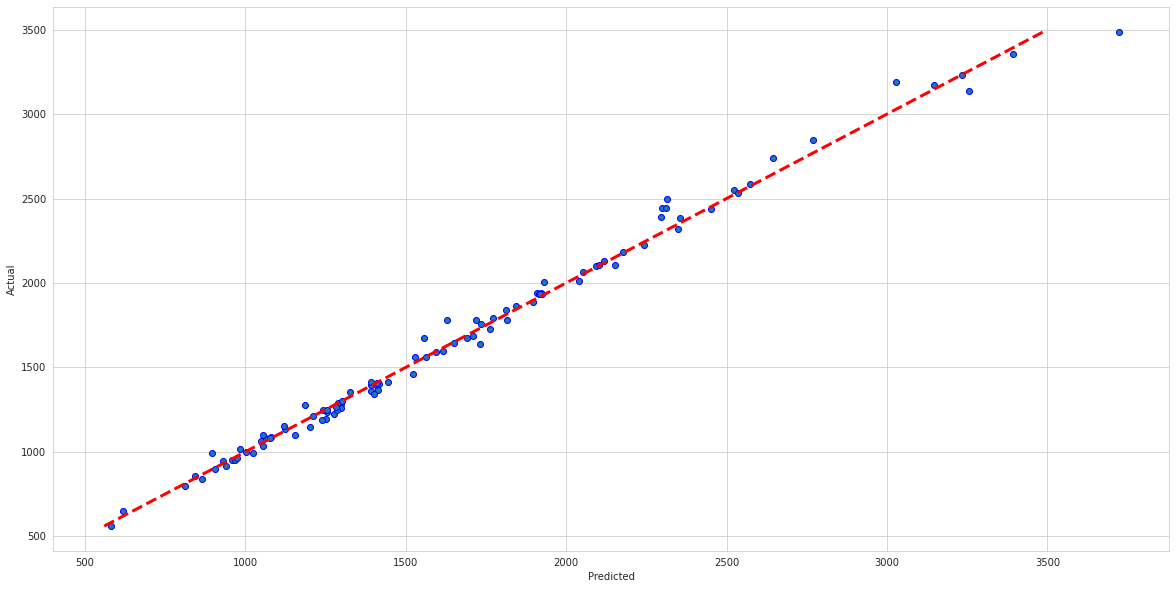

In [152]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(pre_out, out, edgecolors=(0, 0, 1))
ax.plot([my_min(out), my_maxi(out)], [my_min(out), my_maxi(out)], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [153]:
# model evaluation for testing set

mae = mean_absolute_error(y_test_1, predict_test_1)
mse = mean_squared_error(y_test_1, predict_test_1)
r2 = r2_score(y_test_1, predict_test_1)

print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(round(mae, 3)))
print('MSE is {}'.format(round(mse, 3)))
print('RMSE is {}'.format(round(mse**(0.5), 3)))
print('R2 score is {}'.format(round(r2, 3)))

print('Adjusted R2 score is {}'.format(adj_rsqrd(X_test_1, r2)))

The model performance for test set
--------------------------------------
MAE is 43.927
MSE is 4803.643
RMSE is 69.308
R2 score is 0.988
Adjusted R2 score is 0.988


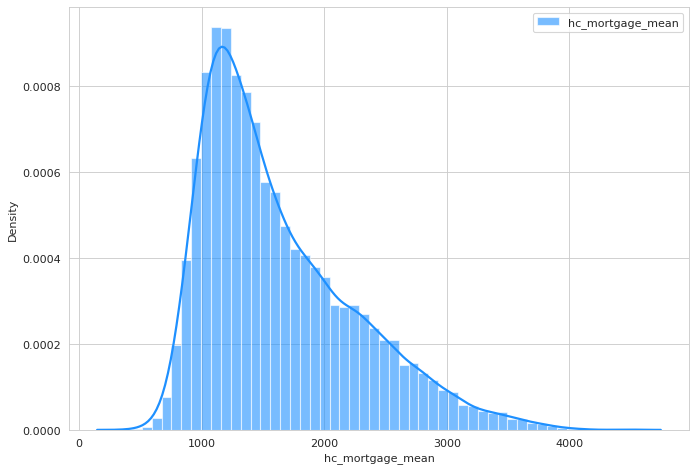

In [154]:
# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(y_train_1, color="dodgerblue", label="hc_mortgage_mean", **kwargs)
# sns.distplot(x2, color="orange", label="SUV", **kwargs)
# sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
# plt.xlim(50,75)
plt.legend();

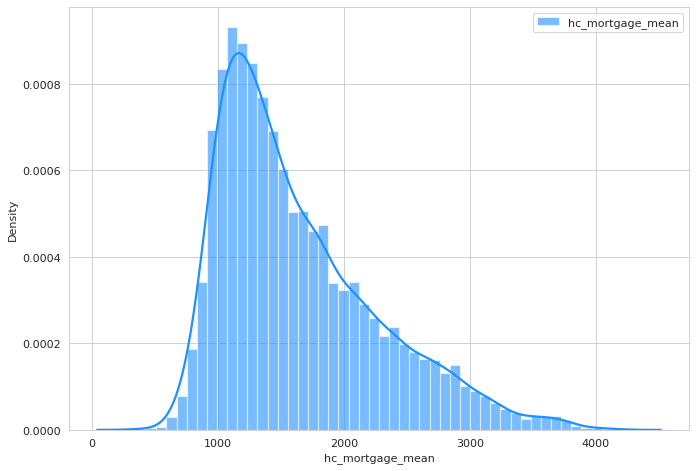

In [155]:
# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(y_test_1, color="dodgerblue", label="hc_mortgage_mean", **kwargs)
# sns.distplot(x2, color="orange", label="SUV", **kwargs)
# sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
# plt.xlim(50,75)
plt.legend();

### 11.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a)	Box plot of distribution of average rent by type of place (Village, urban, town etc.)
b)	Pie charts (Venn diagram) to show overall debt (% bad and good debt) and bad debt (2 mortgage and home equity loan)
c)	Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10%. Visualize using geo-map.
d)	Heat map for correlation matrix
e)	Pie chart to show the population distribution across different types of places (Village, urban, town etc.)

https://public.tableau.com/app/profile/shubhangi.yerkal/viz/RealEstate_16914987986460/Dashboard1?publish=yes

In [156]:
from PIL import Image

In [157]:
img=Image.open('Tableau screenshot.JPG')

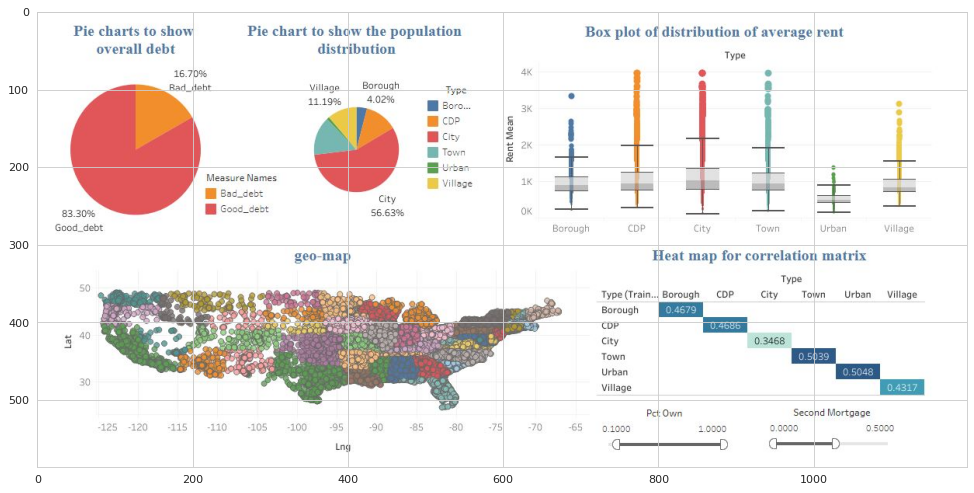

In [158]:
plt.figure(figsize=(15,10),dpi=80)
plt.imshow(img)

### 9.	The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables.

Each variable is assumed to depend on a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as "specific variance" because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data
1. Highschool graduation rates
2. Median population age
3. Second Mortgage Statistics
4. Percent Own
5. Bad Debt Expense

In [159]:
train_new_df=pd.read_csv('train.csv')

In [160]:
test_new_df=pd.read_csv('test.csv')

In [161]:
train_new_df.shape

(12513, 80)

In [162]:
test_new_df.shape

(8937, 80)

In [163]:
def cat_variables(df):
    cat_variables = list(df.select_dtypes(exclude = ['int', 'float']).columns)
    return cat_variables

In [164]:
def num_variables(df):
    num_variables = list(df.select_dtypes(include = ['int', 'float']).columns)
    return num_variables

In [165]:
cat_variables(train_new_df)

['state', 'state_ab', 'city', 'place', 'type', 'primary', 'lng']

In [166]:
num_variables(train_new_df)

['UID',
 'BLOCKID',
 'SUMLEVEL',
 'COUNTYID',
 'STATEID',
 'zip_code',
 'area_code',
 'lat',
 'ALand',
 'AWater',
 'pop',
 'male_pop',
 'female_pop',
 'rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'universe_samples',
 'used_samples',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev

In [167]:
fa_train_df = train_new_df[num_variables(train_new_df)]
fa_train_df

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID  zip_code  area_code  \
0      267822      NaN       140        53       36     13346        315   
1      246444      NaN       140       141       18     46616        574   
2      245683      NaN       140        63       18     46122        317   
3      279653      NaN       140       127       72       927        787   
4      247218      NaN       140       161       20     66502        785   
...       ...      ...       ...       ...      ...       ...        ...   
12508  255188      NaN       140       161       26     48197        734   
12509  240397      NaN       140       245       13     30906        706   
12510  251120      NaN       140        27       25      1420        978   
12511  291183      NaN       140        33       53     98117        206   
12512  256921      NaN       140       137       27     55803        218   

             lat        ALand     AWater  ...  female_age_mean  \
0      42.840812  202183361.0  1699120.0  ...         44.48629   
1      41.701441    1560828.0   100363.0  ...         36.48391   
2      39.792202   69561595.0   284193.0  ...         42.15810   
3      18.396103    1105793.0        0.0  ...         47.77526   
4      39.195573    2554403.0        0.0  ...         24.17693   
...          ...          ...        ...  ...              ...   
12508  42.220559    1892447.0     2004.0  ...         30.87275   
12509  33.434136    6742997.0    27745.0  ...         43.45140   
12510  42.576436    3211646.0    10033.0  ...         37.82698   
12511  47.685096    1493249.0        0.0  ...         38.97593   
12512  46.853471          NaN        NaN  ...              NaN   

       female_age_median  female_age_stdev  female_age_sample_weight  \
0               45.33333          22.51276                 685.33845   
1               37.58333          23.43353                 267.23367   
2               42.83333          23.94119                 707.01963   
3               50.58333          24.32015                 362.20193   
4               21.58333          11.10484                1854.48652   
...                  ...               ...                       ...   
12508           25.91667          15.69777                 315.07146   
12509           46.16667          23.73648                 804.60756   
12510           33.25000          24.45782                 764.81692   
12511           38.83333          20.66153                 704.81384   
12512                NaN               NaN                       NaN   

       female_age_samples  pct_own  married  married_snp  separated  divorced  
0                  2618.0  0.79046  0.57851      0.01882    0.01240   0.08770  
1                  1284.0  0.52483  0.34886      0.01426    0.01426   0.09030  
2                  3238.0  0.85331  0.64745      0.02830    0.01607   0.10657  
3                  1559.0  0.65037  0.47257      0.02021    0.02021   0.10106  
4                  3051.0  0.13046  0.12356      0.00000    0.00000   0.03109  
...                   ...      ...      ...          ...        ...       ...  
12508              1029.0  0.08881  0.29096      0.01835    0.00655   0.08257  
12509              3062.0  0.50141  0.41594      0.05894    0.02995   0.09903  
12510              3179.0  0.58918  0.44332      0.04636    0.02610   0.09272  
12511              2868.0  0.67227  0.53217      0.00046    0.00000   0.10524  
12512                 NaN      NaN      NaN          NaN        NaN       NaN  

[12513 rows x 73 columns]

In [168]:
# exclude columns you don't want
fa_train_df = fa_train_df[fa_train_df.columns[~fa_train_df.columns.isin(['SUMLEVEL', 'lat', 'lng', 'ALand', 'AWater'])]]

In [169]:
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [170]:
fa_train_df .shape

(12513, 69)

In [171]:
fa_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12513 entries, 0 to 12512
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          12513 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   COUNTYID                     12513 non-null  int64  
 3   STATEID                      12513 non-null  int64  
 4   zip_code                     12513 non-null  int64  
 5   area_code                    12513 non-null  int64  
 6   pop                          12512 non-null  float64
 7   male_pop                     12512 non-null  float64
 8   female_pop                   12512 non-null  float64
 9   rent_mean                    12372 non-null  float64
 10  rent_median                  12372 non-null  float64
 11  rent_stdev                   12372 non-null  float64
 12  rent_sample_weight           12372 non-null  float64
 13  rent_samples    

In [172]:
fa_train_df.drop(columns=['BLOCKID'],axis=1,inplace=True)

In [173]:
fa_train_df.shape

(12513, 68)

In [174]:
len(fa_train_df.columns[fa_train_df.isnull().sum(axis=0)>0])

63

In [175]:
null_rows_2=fa_train_df[fa_train_df.isnull().any(axis=1)]
null_rows_2

UID  COUNTYID  STATEID  zip_code  area_code     pop  male_pop  \
51     223593        19        4     85734        520  4531.0    4370.0   
94     233040       101        8     81001        719   579.0     270.0   
153    263292        13       34      7107        973  3458.0    1787.0   
302    267158        47       36     11215        718     0.0       0.0   
340    292484        25       55     53703        608  3274.0    1293.0   
...       ...       ...      ...       ...        ...     ...       ...   
12338  279610       127       72       928        787  2266.0     834.0   
12361  274458       109       40     73102        405   182.0     115.0   
12435  290374       710       51     23502        757     0.0       0.0   
12494  246025        95       18     46060        765  3518.0    3509.0   
12512  256921       137       27     55803        218     NaN       NaN   

       female_pop   rent_mean  rent_median  ...  female_age_mean  \
51          161.0         NaN          NaN  ...         40.02370   
94          309.0   782.00000        781.0  ...         20.00784   
153        1671.0   890.69365        929.0  ...         35.47667   
302           0.0         NaN          NaN  ...              NaN   
340        1981.0  1191.78679        956.0  ...         22.03226   
...           ...         ...          ...  ...              ...   
12338      1432.0   147.54810        104.0  ...         26.77626   
12361        67.0   283.80307        220.0  ...         59.38249   
12435         0.0         NaN          NaN  ...              NaN   
12494         9.0   646.12963        645.0  ...         54.28123   
12512         NaN         NaN          NaN  ...              NaN   

       female_age_median  female_age_stdev  female_age_sample_weight  \
51              40.83333           8.49563                  30.01695   
94              19.25000           4.30291                 172.56153   
153             35.58333          20.62717                 369.61740   
302                  NaN               NaN                       NaN   
340             21.08333           5.13435                1365.86300   
...                  ...               ...                       ...   
12338           24.41667          19.03316                 366.92156   
12361           64.16667          13.96468                  20.66249   
12435                NaN               NaN                       NaN   
12494           54.25000           2.78274                   1.67797   
12512                NaN               NaN                       NaN   

       female_age_samples  pct_own  married  married_snp  separated  divorced  
51                  161.0      NaN  0.16308      0.16308    0.02634   0.20499  
94                  309.0  0.00000  0.00000      0.00000    0.00000   0.00000  
153                1671.0  0.24002  0.37411      0.05579    0.02504   0.07654  
302                   NaN      NaN      NaN          NaN        NaN       NaN  
340                1981.0  0.00000  0.00773      0.00000    0.00000   0.01160  
...                   ...      ...      ...          ...        ...       ...  
12338              1432.0  0.00000  0.03865      0.00000    0.00000   0.05314  
12361                67.0  0.02198  0.11712      0.04505    0.00000   0.48649  
12435                 NaN      NaN      NaN          NaN        NaN       NaN  
12494                 9.0  0.00000  0.10288      0.10288    0.02337   0.25677  
12512                 NaN      NaN      NaN          NaN        NaN       NaN  

[348 rows x 68 columns]

In [176]:
(348/12513)*100

2.781107648046032

In [177]:
fa_train_df = pd.concat([fa_train_df, null_rows_2, null_rows_2]).drop_duplicates(keep=False)

In [178]:
fa_train_df.shape

(12165, 68)

In [179]:
len(fa_train_df.columns[fa_train_df.isnull().sum(axis=0)>0])

0

In [180]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer( rotation=None, n_factors = 25)

In [181]:
train_df.shape

(12165, 31)

In [183]:
fa.fit(train_df)

FactorAnalyzer(n_factors=25, rotation=None, rotation_kwargs={})

In [184]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([7.57088436e+00, 4.27512392e+00, 2.99161913e+00, 2.14029845e+00,
       1.93924290e+00, 1.52638565e+00, 1.34953352e+00, 1.30398770e+00,
       9.72458739e-01, 8.15347435e-01, 6.79878139e-01, 6.33025373e-01,
       5.73236087e-01, 5.24915522e-01, 4.70358801e-01, 3.99501375e-01,
       3.75916007e-01, 3.50847623e-01, 3.11498251e-01, 2.83232555e-01,
       2.39088974e-01, 2.20751676e-01, 2.14026568e-01, 2.07564544e-01,
       1.55515677e-01, 1.44324704e-01, 1.14221722e-01, 1.00396412e-01,
       7.86851634e-02, 3.15268184e-02, 6.60621157e-03])

In [185]:
print(sorted(ev, reverse=True))

[7.570884355752323, 4.275123920017025, 2.9916191310847178, 2.1402984455089493, 1.9392429047237474, 1.526385648338118, 1.3495335157039268, 1.3039877008307375, 0.9724587386818055, 0.815347435430352, 0.6798781385988164, 0.6330253728442834, 0.5732360866167423, 0.5249155223088642, 0.4703588012181757, 0.39950137515259526, 0.37591600717833207, 0.3508476233627324, 0.3114982511873748, 0.2832325545961217, 0.23908897406525612, 0.22075167614486443, 0.21402656800676365, 0.20756454405390867, 0.1555156774633129, 0.1443247039725599, 0.11422172219152367, 0.10039641163846852, 0.07868516336278969, 0.03152681839220227, 0.006606211572608851]


In [186]:
loadings = fa.loadings_

In [187]:
xvals = range(1, train_df.shape[1]+1)

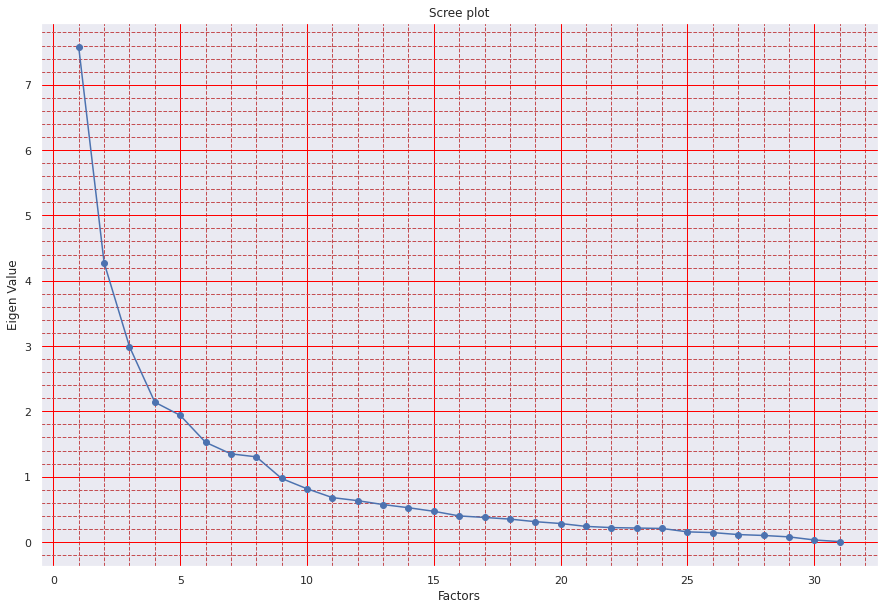

In [188]:
sns.set()
plt.figure(figsize = (15,10))
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid(color = 'red', )
plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.minorticks_on()
plt.show()

In [189]:
Factors  = pd.DataFrame.from_records(loadings)

Factors = Factors.add_prefix('Factor ')

Factors.index = train_df.columns
Factors

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  \
ALand                       -0.048828  0.090813 -0.113211  0.013413 -0.089836   
AWater                      -0.011884  0.023831 -0.061075  0.011872 -0.051161   
pop                          0.104358  0.172644  0.804188  0.391166 -0.142843   
rent_mean                    0.824324 -0.184323  0.078809  0.079004  0.089530   
rent_stdev                   0.663397 -0.144518  0.005719  0.223928  0.035128   
rent_sample_weight          -0.491344 -0.295950  0.348741  0.335033 -0.197240   
rent_gt_10                  -0.011768 -0.300154  0.291500 -0.030387  0.565749   
rent_gt_15                  -0.035590 -0.419071  0.291660  0.016761  0.714264   
rent_gt_20                  -0.105444 -0.428885  0.195628  0.056253  0.613790   
hi_mean                      0.924545  0.172582  0.020106 -0.003689 -0.074470   
hi_sample_weight            -0.399799  0.160713  0.722457  0.457978 -0.073261   
hc_mortgage_mean             0.904773 -0.236484 -0.037600  0.235390 -0.005160   
hc_mortgage_median           0.887771 -0.247313 -0.038491  0.229018 -0.007489   
hc_mortgage_stdev            0.776804 -0.052197 -0.069370  0.238895  0.022907   
hc_mortgage_sample_weight   -0.142982  0.591082  0.690958  0.010959 -0.044319   
hc_mean                      0.794804 -0.158146 -0.093336  0.286485 -0.020209   
hc_stdev                     0.622993 -0.045508 -0.135105  0.351689  0.005998   
hc_samples                  -0.089225  0.772069  0.259814  0.380170  0.095301   
home_equity_second_mortgage  0.189348 -0.221390  0.406098 -0.547625 -0.040470   
home_equity                  0.595954 -0.128115  0.290038 -0.352058  0.002389   
debt                         0.496456 -0.311243  0.483726 -0.330157 -0.106966   
second_mortgage_cdf         -0.285522  0.018456 -0.411368  0.506677 -0.009657   
hs_degree                    0.549801  0.313776  0.103469 -0.162389 -0.067352   
male_age_mean                0.205078  0.516032 -0.275021  0.080718  0.254210   
male_age_stdev               0.009809  0.605360 -0.159099  0.006569  0.383330   
female_age_stdev            -0.102541  0.484053 -0.145496  0.029041  0.344212   
pct_own                      0.373209  0.756136 -0.010695 -0.230973  0.167345   
married                      0.458956  0.628252  0.030597 -0.062142  0.122659   
married_snp                 -0.291069 -0.415067 -0.097445  0.246585  0.064955   
separated                   -0.340516 -0.300866 -0.095115  0.174423  0.103135   
divorced                    -0.451219  0.085865 -0.060982 -0.075404  0.069670   

                             Factor 5  Factor 6  Factor 7  Factor 8  Factor 9  \
ALand                        0.005027  0.051229  0.331032  0.440243  0.228499   
AWater                      -0.005891  0.032348  0.315456  0.406168  0.253254   
pop                         -0.031574  0.175452 -0.013508  0.098132 -0.077378   
rent_mean                   -0.106863  0.144683  0.016082  0.012907  0.059252   
rent_stdev                   0.070333 -0.042576 -0.036837  0.103815  0.059584   
rent_sample_weight           0.219230 -0.358922 -0.147927  0.042800  0.079679   
rent_gt_10                  -0.208417 -0.021710  0.036211 -0.045843  0.040461   
rent_gt_15                  -0.191387 -0.045079  0.082552  0.027723  0.012719   
rent_gt_20                  -0.109786 -0.046611  0.071386  0.048186 -0.031833   
hi_mean                     -0.072259  0.101292 -0.045123 -0.018880  0.071197   
hi_sample_weight             0.132644 -0.164815  0.017609 -0.007797  0.033621   
hc_mortgage_mean             0.083150 -0.024151 -0.003989  0.026733 -0.046895   
hc_mortgage_median           0.074962 -0.014640 -0.019970  0.037606 -0.044546   
hc_mortgage_stdev            0.156015 -0.086726  0.091219 -0.015077 -0.039971   
hc_mortgage_sample_weight   -0.109272  0.151467 -0.038131 -0.061264  0.150542   
hc_mean                      0.043620 -0.124703 -0.013342 -0.059974  0.004299   
hc_stdev                     0.118404 -0.132240  0.098370 -

In [190]:
fa = FactorAnalyzer( rotation="varimax", n_factors = 12)
fa.fit(train_df)
loadings = fa.loadings_

In [191]:
Factors  = pd.DataFrame.from_records(loadings)

Factors = Factors.add_prefix('Factor ')

Factors.index = train_df.columns
Factors

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  \
ALand                       -0.038491 -0.008827  0.020512 -0.074393 -0.026537   
AWater                      -0.001059 -0.008456  0.006508 -0.017071 -0.010132   
pop                          0.173865  0.885100 -0.072507  0.042089  0.079607   
rent_mean                    0.774519  0.001359  0.245323  0.124317  0.098564   
rent_stdev                   0.695893 -0.002020  0.028260  0.026617  0.042411   
rent_sample_weight          -0.239610  0.239155 -0.819143  0.043269 -0.034753   
rent_gt_10                  -0.003201  0.036268 -0.016818  0.611163  0.048986   
rent_gt_15                   0.017712  0.001654 -0.037219  0.979854  0.034548   
rent_gt_20                  -0.006114 -0.044316 -0.106077  0.741816  0.016374   
hi_mean                      0.772987  0.057951  0.387612 -0.153133  0.108461   
hi_sample_weight            -0.222135  0.820373 -0.505538  0.088753 -0.004485   
hc_mortgage_mean             0.958080 -0.086863  0.026182  0.020973  0.095723   
hc_mortgage_median           0.936088 -0.090771  0.029602  0.022791  0.089481   
hc_mortgage_stdev            0.782594 -0.037834  0.055870 -0.032568  0.086256   
hc_mortgage_sample_weight   -0.281114  0.815470  0.222653 -0.046920  0.080790   
hc_mean                      0.842647 -0.073246  0.029399 -0.008721 -0.002358   
hc_stdev                     0.709000 -0.019295  0.022643 -0.043465 -0.040643   
hc_samples                  -0.083166  0.690176  0.236147 -0.126447 -0.131719   
home_equity_second_mortgage  0.032920 -0.016252 -0.046287  0.054894  0.949162   
home_equity                  0.422381 -0.027104  0.052724  0.049883  0.524667   
debt                         0.324898  0.088280  0.037559  0.138596  0.343328   
second_mortgage_cdf         -0.087793 -0.084080 -0.090807 -0.033646 -0.788638   
hs_degree                    0.347488  0.084341  0.191827 -0.127091  0.138931   
male_age_mean                0.145871 -0.019344  0.221748 -0.098246 -0.064473   
male_age_stdev              -0.039015  0.048302  0.152456 -0.059910 -0.032291   
female_age_stdev            -0.098069  0.035088  0.046868 -0.056899 -0.031312   
pct_own                      0.077262  0.223320  0.755895 -0.148064  0.053401   
married                      0.236272  0.227584  0.521015 -0.168636  0.042989   
married_snp                 -0.051148 -0.045405 -0.111879  0.063161 -0.039003   
separated                   -0.159963 -0.055347 -0.113873  0.067703 -0.037343   
divorced                    -0.402441 -0.037581 -0.192822 -0.002475 -0.011628   

                             Factor 5  Factor 6  Factor 7  Factor 8  Factor 9  \
ALand                       -0.001741  0.022035 -0.003820 -0.028440  0.822995   
AWater                       0.003157 -0.012769  0.007959 -0.007210  0.435603   
pop                         -0.011951 -0.070458 -0.219569  0.051768 -0.015570   
rent_mean                   -0.065437 -0.123349 -0.036967  0.160858 -0.020845   
rent_stdev                  -0.044074  0.016255 -0.002407  0.056207  0.001351   
rent_sample_weight           0.114693 -0.045542 -0.031170  0.036964 -0.034004   
rent_gt_10                   0.011601 -0.060614 -0.015744  0.083916 -0.061191   
rent_gt_15                   0.039338 -0.037400 -0.014455  0.020597 -0.016987   
rent_gt_20                   0.105388 -0.022389 -0.068703 -0.051048 -0.025727   
hi_mean                     -0.218913  0.002787  0.063841  0.236583 -0.011666   
hi_sample_weight             0.034825  0.026397  0.085768 -0.054333 -0.021153   
hc_mortgage_mean            -0.044628 -0.063441 -0.010632  0.050402 -0.020009   
hc_mortgage_median          -0.040252 -0.062975 -0.033270  0.060132 -0.021475   
hc_mortgage_stdev           -0.061377  0.020535  0.127077 -0.017269  0.008839   
hc_mortgage_sample_weight   -0.150022  0.102130  0.058171  0.224095 -0.023158   
hc_mean                     -0.076673 -0.037675  0.015651  0.051935 -0.030911   
hc_stdev                    -0.023018  0.026382  0.080568 -

In [192]:
len(train_df.columns)

31

In [193]:
# Get variance of each factors
fact_variance  = fa.get_factor_variance()
fact_variance

(array([6.22367058, 2.81980847, 2.29931593, 2.08047262, 2.03489583,
        1.83129939, 1.81828516, 1.1108032 , 1.06691425, 0.88807047,
        0.45119573, 0.34422995]),
 array([0.20076357, 0.09096156, 0.07417148, 0.06711202, 0.0656418 ,
        0.05907417, 0.05865436, 0.03583236, 0.03441659, 0.02864743,
        0.0145547 , 0.01110419]),
 array([0.20076357, 0.29172513, 0.36589661, 0.43300863, 0.49865043,
        0.55772461, 0.61637897, 0.65221133, 0.68662792, 0.71527535,
        0.72983005, 0.74093424]))

In [194]:
Factor_variance  = pd.DataFrame.from_records(fact_variance)

Factor_variance = Factor_variance.add_prefix('Factor ')

Factor_variance.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
round(Factor_variance, 2)

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
SS Loadings         6.22      2.82      2.30      2.08      2.03      1.83   
Proportion Var      0.20      0.09      0.07      0.07      0.07      0.06   
Cumulative Var      0.20      0.29      0.37      0.43      0.50      0.56   

                Factor 6  Factor 7  Factor 8  Factor 9  Factor 10  Factor 11  
SS Loadings         1.82      1.11      1.07      0.89       0.45       0.34  
Proportion Var      0.06      0.04      0.03      0.03       0.01       0.01  
Cumulative Var      0.62      0.65      0.69      0.72       0.73       0.74